In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                !pip install pyodbc
!pip install pandas
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.9/331.9 kB 4.6 MB/s eta 0:00:00a 0:00:01


In [1]:
import pyodbc
import pandas as pd
import csv

# Konfiguracja połączenia zapisana w formie słownika
connection_config = {
    'server': 'analityk.wwsi.edu.pl,50221',
    'database': 'synop',
    'user': 'student',
    'password': 'ciekawski',
    'encrypt': 'yes',  # Lub 'no', w zależności od konfiguracji serwera
    'trust_server_certificate': 'yes',  # Lub 'no', w zależności od konfiguracji serwera
    'driver': '{ODBC Driver 17 for SQL Server}',  # To jest nazwa sterownika ODBC
    'autocommit': True  # Opcjonalnie, jeśli chcesz włączyć tryb autocommit
}

# Tworzenie łańcucha połączenia z konfiguracji
connection_string = (
    f"DRIVER={connection_config['driver']};"
    f"SERVER={connection_config['server']};"
    f"DATABASE={connection_config['database']};"
    f"UID={connection_config['user']};"
    f"PWD={connection_config['password']};"
    f"Encrypt={connection_config['encrypt']};"
    f"TrustServerCertificate={connection_config['trust_server_certificate']};"
)

try:
    # Nawiązanie połączenia
    conn = pyodbc.connect(connection_string)

    # Wykonanie operacji na bazie danych
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM [Synop].[dbo].[DaneModelTMP]")
    rows = cursor.fetchall()
    # for row in rows:
    # Zapisz wyniki do pliku CSV

    with open('DaneModelTMP_baza.csv_', 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow([i[0] for i in cursor.description])  # Nagłówki kolumn
        csv_writer.writerows(rows)  # Dane

except pyodbc.Error as ex:
    print(f"Błąd połączenia: {ex}")

finally:
    if 'conn' in locals():
        conn.close()

Błąd połączenia: ('01000', "[01000] [unixODBC][Driver Manager]Can't open lib '/opt/microsoft/msodbcsql17/lib64/libmsodbcsql-17.6.so.1.1' : file not found (0) (SQLDriverConnect)")


In [50]:
# import pyodbc
# import pandas as pd
# import csv

# # Konfiguracja połączenia zapisana w formie słownika
# connection_config = {
#     'server': 'analityk.wwsi.edu.pl,50221',
#     'database': 'synop',
#     'user': 'student',
#     'password': 'ciekawski',
#     'encrypt': 'yes',  # Lub 'no', w zależności od konfiguracji serwera
#     'trust_server_certificate': 'yes',  # Lub 'no', w zależności od konfiguracji serwera
#     'driver': '{ODBC Driver 18 for SQL Server}',  # To jest nazwa sterownika ODBC
#     'autocommit': True  # Opcjonalnie, jeśli chcesz włączyć tryb autocommit
# }

# # Tworzenie łańcucha połączenia z konfiguracji
# connection_string = (
#     f"DRIVER={connection_config['driver']};"
#     f"SERVER={connection_config['server']};"
#     f"DATABASE={connection_config['database']};"
#     f"UID={connection_config['user']};"
#     f"PWD={connection_config['password']};"
#     f"Encrypt={connection_config['encrypt']};"
#     f"TrustServerCertificate={connection_config['trust_server_certificate']};"
# )

# # Nawiązanie połączenia
# conn = pyodbc.connect(connection_string)

# # Wykonanie operacji na bazie danych
# #cursor = conn.cursor()
# #    cursor.execute("SELECT * FROM [Synop].[dbo].[DaneModelTMP] Where Pred6 > -1 and data > '20000101'")
# #    rows = cursor.fetchall()
#     # for row in rows:
# query = "SELECT * FROM [Synop].[dbo].[DaneModelTMP] Where Pred6 > -1 and data > '20000101'"
# df = pd.read_sql(query, conn)
#     # Zapisz wyniki do pliku CSV
# print(df.head())
# conn.close()

In [7]:
import warnings
#import cudf
import pandas as pd
from io import StringIO
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
df = pd.read_csv('DaneModelTMP.csv', delimiter=',')

In [8]:
df

czas        data  Pora  miesiac  Widz3  Widz6  \
0       2013-08-06 04:00:00  2013-08-06     1        8  30000  30000   
1       2013-08-06 08:00:00  2013-08-06     2        8  20000  23333   
2       2013-08-06 12:00:00  2013-08-06     3        8  30000  26666   
3       2013-08-06 16:00:00  2013-08-06     4        8  30000  30000   
4       2013-08-06 20:00:00  2013-08-06     5        8  30000  30000   
...                     ...         ...   ...      ...    ...    ...   
152765  2022-12-21 23:00:00  2022-12-21     5       12   2266   3216   
152766  2022-12-22 00:00:00  2022-12-22     0       12   2533   2883   
152767  2022-12-22 01:00:00  2022-12-22     0       12   2800   2750   
152768  2022-12-22 02:00:00  2022-12-22     0       12   2500   2383   
152769  2022-12-22 03:00:00  2022-12-22     0       12   1900   2216   

          Zachm3    Zachm6   ZachmN3   ZachmN6  ...  OpadM_E  OpadM_N  \
0       0.000000  0.000000  0.000000  0.000000  ...        0        0   
1       1.000000  0.500000  0.000000  0.000000  ...        0        0   
2       2.333333  1.833333  1.333333  0.833333  ...        0        0   
3       2.666666  2.666666  1.666666  1.666666  ...        0        0   
4       2.000000  2.166666  1.000000  1.166666  ...        0        0   
...          ...       ...       ...       ...  ...      ...      ...   
152765  8.000000  8.000000  8.000000  7.666666  ...        0        0   
152766  8.000000  8.000000  7.666666  7.666666  ...        0        0   
152767  8.000000  8.000000  7.333333  7.666666  ...        0        0   
152768  8.000000  8.000000  7.000000  7.500000  ...        0        0   
152769  8.000000  8.000000  7.333333  7.500000  ...        0        0   

        OpadM_S  Przelotny_W  Przelotny_E  Przelotny_N  Przelotny_S  Pred3  \
0             0            0            0            0            0     -1   
1             0            0            0            0            0     -1   
2             0            0            0            0            0     -1   
3             0            0            0            0            0     -1   
4             0            0            0            0            0     -1   
...         ...          ...          ...          ...          ...    ...   
152765        0            1            0            0            0     -1   
152766        0            0            0            0            0     -1   
152767        0            0            0            1            0     -1   
152768        0            0            0            1            0     -1   
152769        0            0            0            1            0     -1   

        Pred6      id  
0           0     169  
1           0     170  
2           0     171  
3           0     172  
4           0     173  
...       ...     ...  
152765      2  180009  
152766      2  180010  
152767      2  180011  
152768      2  180012  
152769      2  180013  

[152770 rows x 62 columns]

In [3]:
import warnings
# import cudf
import pandas as pd
from io import StringIO
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
df = pd.read_csv('DaneModelTMP.csv', delimiter=',')

In [4]:
df.isnull()

czas   data   Pora  miesiac  Widz3  Widz6  Zachm3  Zachm6  ZachmN3  \
0       False  False  False    False  False  False   False   False    False   
1       False  False  False    False  False  False   False   False    False   
2       False  False  False    False  False  False   False   False    False   
3       False  False  False    False  False  False   False   False    False   
4       False  False  False    False  False  False   False   False    False   
...       ...    ...    ...      ...    ...    ...     ...     ...      ...   
152765  False  False  False    False  False  False   False   False    False   
152766  False  False  False    False  False  False   False   False    False   
152767  False  False  False    False  False  False   False   False    False   
152768  False  False  False    False  False  False   False   False    False   
152769  False  False  False    False  False  False   False   False    False   

        ZachmN6  ...  OpadM_E  OpadM_N  OpadM_S  Przelotny_W  Przelotny_E  \
0         False  ...    False    False    False        False        False   
1         False  ...    False    False    False        False        False   
2         False  ...    False    False    False        False        False   
3         False  ...    False    False    False        False        False   
4         False  ...    False    False    False        False        False   
...         ...  ...      ...      ...      ...          ...          ...   
152765    False  ...    False    False    False        False        False   
152766    False  ...    False    False    False        False        False   
152767    False  ...    False    False    False        False        False   
152768    False  ...    False    False    False        False        False   
152769    False  ...    False    False    False        False        False   

        Przelotny_N  Przelotny_S  Pred3  Pred6     id  
0             False        False  False  False  False  
1             False        False  False  False  False  
2             False        False  False  False  False  
3             False        False  False  False  False  
4             False        False  False  False  False  
...             ...          ...    ...    ...    ...  
152765        False        False  False  False  False  
152766        False        False  False  False  False  
152767        False        False  False  False  False  
152768        False        False  False  False  False  
152769        False        False  False  False  False  

[152770 rows x 62 columns]

In [5]:
#!pip install sqlalchemy

In [6]:
df.shape

(152770, 62)

In [7]:
df.Widz3

0         30000
1         20000
2         30000
3         30000
4         30000
          ...  
152765     2266
152766     2533
152767     2800
152768     2500
152769     1900
Name: Widz3, Length: 152770, dtype: int64

In [8]:
df.drop(['Pred3'], axis=1, inplace=True)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Załadowanie zbioru danych
list_col = list(df.columns.values)

X, y = df[['Pora', 'Zachm3', \
       'Zachm6', 'ZachmN3', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
       'Wiatr_W', 'DeltaTemp3', 'TemperaturaPowietrza', 'DeltaTemp6', \
       'DeltaTempRosy3', 'DeltaTempRosy6', 'TemperaturaPunktuRosy', \
       'Cisn3', 'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', 'Opady12', \
       'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
       'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
       'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
       'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
       'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
       'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
       'Przelotny_S']], df.Pred6

# Podziel dane na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicjalizuj model k-NN z 3 sąsiadami
knn = KNeighborsClassifier(n_neighbors=3)

# Trenuj model na danych treningowych
knn.fit(X_train, y_train)

# Przewiduj klasy na danych testowych
y_pred = knn.predict(X_test)

# Oblicz dokładność modelu
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność modelu: {:.2f}".format(accuracy))


Dokładność modelu: 0.80


Testujemy model z 1 sąsiadami
Testujemy model z 2 sąsiadami
Testujemy model z 3 sąsiadami
Testujemy model z 4 sąsiadami
Testujemy model z 5 sąsiadami
Testujemy model z 6 sąsiadami
Testujemy model z 7 sąsiadami
Testujemy model z 8 sąsiadami
Testujemy model z 9 sąsiadami
Testujemy model z 10 sąsiadami
Testujemy model z 11 sąsiadami
Testujemy model z 12 sąsiadami
Testujemy model z 13 sąsiadami
Testujemy model z 14 sąsiadami
Testujemy model z 15 sąsiadami
Testujemy model z 16 sąsiadami
Testujemy model z 17 sąsiadami
Testujemy model z 18 sąsiadami
Testujemy model z 19 sąsiadami
Testujemy model z 20 sąsiadami


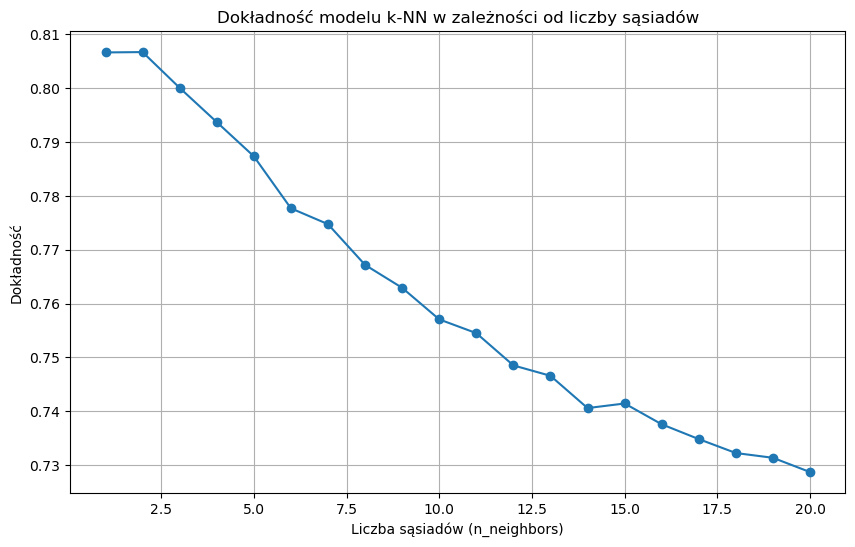

In [10]:
import matplotlib.pyplot as plt
# Przygotuj listy do przechowywania wyników
neighbors = range(1, 21)  # Testujemy od 1 do 20 sąsiadów
accuracies = []

# Testujemy różne wartości n_neighbors
for n in neighbors:
    print(f"Testujemy model z {n} sąsiadami")
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


# Wyświetl wykres dokładności w zależności od liczby sąsiadów
plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracies, marker='o', linestyle='-')
plt.title('Dokładność modelu k-NN w zależności od liczby sąsiadów')
plt.xlabel('Liczba sąsiadów (n_neighbors)')
plt.ylabel('Dokładność')
plt.grid(True)
plt.show()

In [11]:
!pip install xgboost scikit-learn

1. Bagging: Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def train_random_forest(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

X, y = df[['Pora', 'Zachm3', \
       'Zachm6', 'ZachmN3', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
       'Wiatr_W', 'DeltaTemp3', 'TemperaturaPowietrza', 'DeltaTemp6', \
       'DeltaTempRosy3', 'DeltaTempRosy6', 'TemperaturaPunktuRosy', \
       'Cisn3', 'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', 'Opady12', \
       'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
       'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
       'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
       'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
       'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
       'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
       'Przelotny_S']], df.Pred6

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_random_forest(X_train, y_train)

RandomForestClassifier(random_state=42)

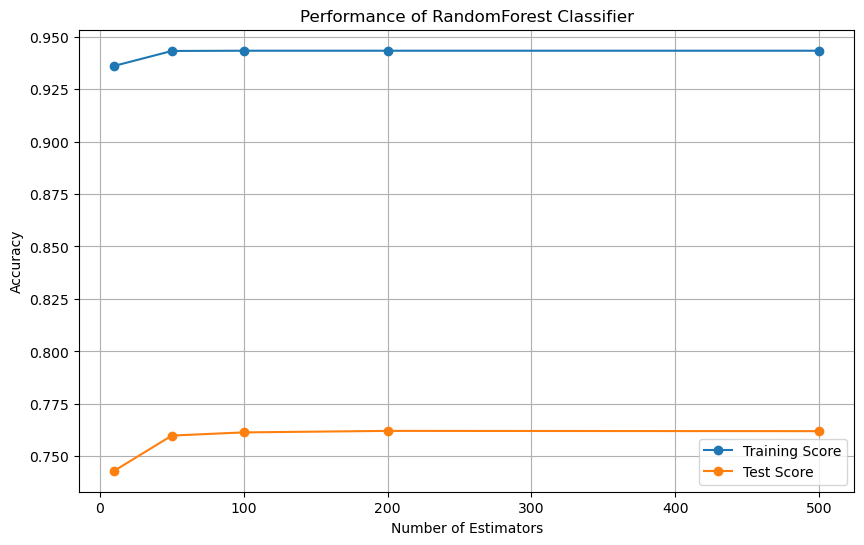

In [16]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Załaduj dane
X, y = df[['Pora', 'Zachm3', \
       'Zachm6', 'ZachmN3', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
       'Wiatr_W', 'DeltaTemp3', 'TemperaturaPowietrza', 'DeltaTemp6', \
       'DeltaTempRosy3', 'DeltaTempRosy6', 'TemperaturaPunktuRosy', \
       'Cisn3', 'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', 'Opady12', \
       'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
       'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
       'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
       'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
       'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
       'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
       'Przelotny_S']], df.Pred6

# Podziel dane
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators_list = [10, 50, 100, 200, 500]
train_scores = []
test_scores = []

for n in n_estimators_list:
    # Trenuj model
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    
    # Zbierz wyniki
    train_scores.append(accuracy_score(y_train, clf.predict(X_train)))
    test_scores.append(accuracy_score(y_test, clf.predict(X_test)))

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_scores, label='Training Score', marker='o')
plt.plot(n_estimators_list, test_scores, label='Test Score', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Performance of RandomForest Classifier')
plt.legend()
plt.grid(True)
plt.show()


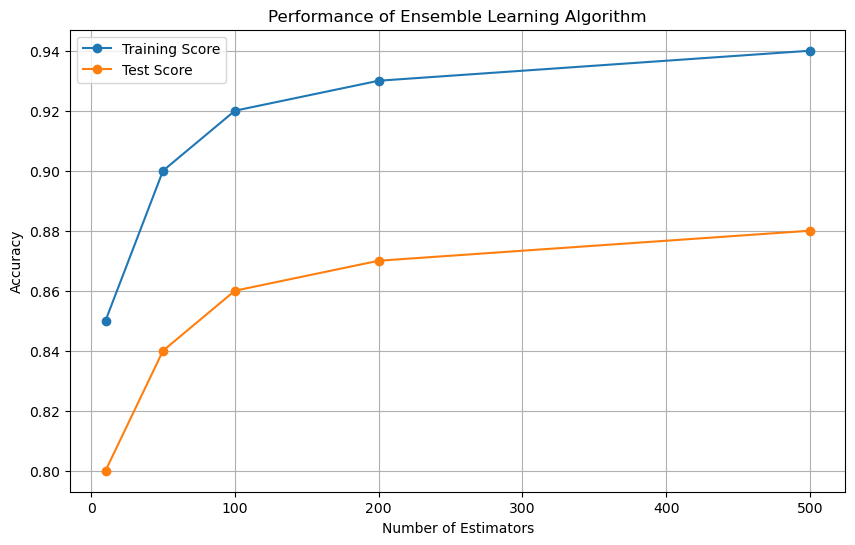

In [14]:
import matplotlib.pyplot as plt

# Przykładowe dane
n_estimators = [10, 50, 100, 200, 500]
train_scores = [0.85, 0.9, 0.92, 0.93, 0.94]
test_scores = [0.8, 0.84, 0.86, 0.87, 0.88]

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, train_scores, label='Training Score', marker='o')
plt.plot(n_estimators, test_scores, label='Test Score', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Performance of Ensemble Learning Algorithm')
plt.legend()
plt.grid(True)
plt.show()


2. Boosting: AdaBoost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

def train_adaboost(X_train, y_train):
    model = AdaBoostClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

X, y = df[['Pora', 'Zachm3', \
       'Zachm6', 'ZachmN3', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
       'Wiatr_W', 'DeltaTemp3', 'TemperaturaPowietrza', 'DeltaTemp6', \
       'DeltaTempRosy3', 'DeltaTempRosy6', 'TemperaturaPunktuRosy', \
       'Cisn3', 'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', 'Opady12', \
       'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
       'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
       'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
       'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
       'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
       'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
       'Przelotny_S']], df.Pred6

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


f_X_train = X_train.to_numpy()
f_y_train = y_train.to_numpy()

f_X_train = f_X_train.astype(np.float64)
f_y_train = f_y_train.astype(np.float64)

train_adaboost(f_X_train, f_y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

3. Stacking

### cuml ensamble models PogodynkAI

In [10]:
!pip install scikit-learn
!pip install dask
!python3 -m pip install tensorflow[and-cuda]

  Obtaining dependency information for tensorflow[and-cuda] from https://files.pythonhosted.org/packages/ed/1a/b4ab4b8f8b3a41fade4899fd00b5b2d2dad0981f3e1bb10df4c522975fd7/tensorflow-2.15.0.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.0 MB/s eta 0:00:00
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/ea/df/55525e489c43f9dbb6c8ea27d8a567b3dcd18a22f3c45483055f5ca6611d/libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl.metada

### Predykcja Pogody algorytmami Klasyfikacyjnymi

In [11]:
!python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

2024-01-22 21:12:37.899385: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-22 21:12:37.933162: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-22 21:12:37.933201: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-22 21:12:37.934152: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-22 21:12:37.939979: I tensorflow/core/platform/cpu_feature_guar

In [14]:
!pip install cupy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 14.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for fastrlock>=0.5 from https://files.pythonhosted.org/packages/7f/8a/24067b0c3e5a0896dbe5e1e547ae176f25b94ce38e21020d1bf78d18d3ba/fastrlock-0.8.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_28_x86_64.whl.metadata
  Using cached fastrlock-0.8.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_28_x86_64.whl.metadata (9.3 kB)
Using cached fastrlock-0.8.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_28_x86_64.whl (52 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [65 lines of output]
      Generating cache key from header files...
      Cache key (1527 files matching /tmp/pip-install-w8_wynuf/cupy_29d597fec7b74b4fa11771f44d187949/cupy/_core/include/**): 33a8b76f2a9c938db79fc107e7d61d191e501c26
     

In [12]:
import tensorflow as tf
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
# Lista urządzeń GPU
gpus = tf.config.list_physical_devices('GPU')

# Sprawdzenie, czy GPU są dostępne
if gpus:
    try:
        # Aby uzyskać więcej informacji o każdym GPU
        for gpu in gpus:
            print(gpu)
            # W TensorFlow 2.x można również użyć tf.config.experimental.get_device_details
            print("Nazwa:", tf.config.experimental.get_device_details(gpu)['device_name'])
    except RuntimeError as e:
        # Wyjątek może wystąpić, jeśli lista urządzeń jest pobierana po inicjalizacji GPU
        print(e)
else:
    print("GPU nie znaleziono.")

2024-01-22 21:12:41.669541: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-22 21:12:41.708033: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-22 21:12:41.708062: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-22 21:12:41.708953: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-22 21:12:41.715464: I tensorflow/core/platform/cpu_feature_guar

GPU nie znaleziono.


In [13]:
import pandas as pd
import warnings
import cupy as cp
import rmm
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
rmm.reinitialize(managed_memory=True)
cp.cuda.set_allocator(rmm.rmm_cupy_allocator)

ModuleNotFoundError: No module named 'cupy'

In [27]:
#!pip install dask-cudf

  Using cached cudf-0.6.1.post1.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [47 lines of output]
      running bdist_wheel
      running build
      /home/student-wwsi/anaconda3/lib/python3.11/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
      !!
      
              ********************************************************************************
              Please avoid running ``setup.py`` directly.
              Instead, use pypa/build, pypa/installer or other
              standards-based tools.
      
              See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
              ********************************************************************************
      
      !!
        self.initialize_options()
      installing to build/bdist.linux-x86_64/

In [1]:
import warnings
import os
#import cupy as cp
import pandas as pd
# import cudf
# import dask_cudf
import pandas as pd
from io import StringIO
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
df = pd.read_csv('DaneModelTMP.csv', delimiter=',')

In [2]:
df

czas        data  Pora  miesiac  Widz3  Widz6  \
0       2013-08-06 04:00:00  2013-08-06     1        8  30000  30000   
1       2013-08-06 08:00:00  2013-08-06     2        8  20000  23333   
2       2013-08-06 12:00:00  2013-08-06     3        8  30000  26666   
3       2013-08-06 16:00:00  2013-08-06     4        8  30000  30000   
4       2013-08-06 20:00:00  2013-08-06     5        8  30000  30000   
...                     ...         ...   ...      ...    ...    ...   
152765  2022-12-21 23:00:00  2022-12-21     5       12   2266   3216   
152766  2022-12-22 00:00:00  2022-12-22     0       12   2533   2883   
152767  2022-12-22 01:00:00  2022-12-22     0       12   2800   2750   
152768  2022-12-22 02:00:00  2022-12-22     0       12   2500   2383   
152769  2022-12-22 03:00:00  2022-12-22     0       12   1900   2216   

          Zachm3    Zachm6   ZachmN3   ZachmN6  ...  OpadM_E  OpadM_N  \
0       0.000000  0.000000  0.000000  0.000000  ...        0        0   
1       1.000000  0.500000  0.000000  0.000000  ...        0        0   
2       2.333333  1.833333  1.333333  0.833333  ...        0        0   
3       2.666666  2.666666  1.666666  1.666666  ...        0        0   
4       2.000000  2.166666  1.000000  1.166666  ...        0        0   
...          ...       ...       ...       ...  ...      ...      ...   
152765  8.000000  8.000000  8.000000  7.666666  ...        0        0   
152766  8.000000  8.000000  7.666666  7.666666  ...        0        0   
152767  8.000000  8.000000  7.333333  7.666666  ...        0        0   
152768  8.000000  8.000000  7.000000  7.500000  ...        0        0   
152769  8.000000  8.000000  7.333333  7.500000  ...        0        0   

        OpadM_S  Przelotny_W  Przelotny_E  Przelotny_N  Przelotny_S  Pred3  \
0             0            0            0            0            0     -1   
1             0            0            0            0            0     -1   
2             0            0            0            0            0     -1   
3             0            0            0            0            0     -1   
4             0            0            0            0            0     -1   
...         ...          ...          ...          ...          ...    ...   
152765        0            1            0            0            0     -1   
152766        0            0            0            0            0     -1   
152767        0            0            0            1            0     -1   
152768        0            0            0            1            0     -1   
152769        0            0            0            1            0     -1   

        Pred6      id  
0           0     169  
1           0     170  
2           0     171  
3           0     172  
4           0     173  
...       ...     ...  
152765      2  180009  
152766      2  180010  
152767      2  180011  
152768      2  180012  
152769      2  180013  

[152770 rows x 62 columns]

In [3]:
df.count

<bound method DataFrame.count of                        czas        data  Pora  miesiac  Widz3  Widz6  \
0       2013-08-06 04:00:00  2013-08-06     1        8  30000  30000   
1       2013-08-06 08:00:00  2013-08-06     2        8  20000  23333   
2       2013-08-06 12:00:00  2013-08-06     3        8  30000  26666   
3       2013-08-06 16:00:00  2013-08-06     4        8  30000  30000   
4       2013-08-06 20:00:00  2013-08-06     5        8  30000  30000   
...                     ...         ...   ...      ...    ...    ...   
152765  2022-12-21 23:00:00  2022-12-21     5       12   2266   3216   
152766  2022-12-22 00:00:00  2022-12-22     0       12   2533   2883   
152767  2022-12-22 01:00:00  2022-12-22     0       12   2800   2750   
152768  2022-12-22 02:00:00  2022-12-22     0       12   2500   2383   
152769  2022-12-22 03:00:00  2022-12-22     0       12   1900   2216   

          Zachm3    Zachm6   ZachmN3   ZachmN6  ...  OpadM_E  OpadM_N  \
0       0.000000  0.000000  0

Pred6 - oznaczenia 

0 - brak zjawisk 

1 - mgła 

2 - Mżawka 

3 - burza 

4 - deszcz 

5 - śnieg 

6 - opad marznący  

7 - opad przelotny  

-9 - błąd 

‘accuracy’

metrics.accuracy_score

‘balanced_accuracy’

metrics.balanced_accuracy_score

‘top_k_accuracy’

metrics.top_k_accuracy_score

‘average_precision’

metrics.average_precision_score

‘neg_brier_score’

metrics.brier_score_loss

‘f1’

metrics.f1_score

for binary targets

‘f1_micro’

metrics.f1_score

micro-averaged

‘f1_macro’

metrics.f1_score

macro-averaged

‘f1_weighted’

metrics.f1_score

weighted average

‘f1_samples’

metrics.f1_score

by multilabel sample

‘neg_log_loss’

metrics.log_loss

requires predict_proba support

‘precision’ etc.

metrics.precision_score

suffixes apply as with ‘f1’

‘recall’ etc.

metrics.recall_score

suffixes apply as with ‘f1’

‘jaccard’ etc.

metrics.jaccard_score

suffixes apply as with ‘f1’

‘roc_auc’

metrics.roc_auc_score

‘roc_auc_ovr’

metrics.roc_auc_score

‘roc_auc_ovo’

metrics.roc_auc_score

‘roc_auc_ovr_weighted’

metrics.roc_auc_score

‘roc_auc_ovo_weighted’

metrics.roc_auc_score



In [12]:
import numpy as np
import warnings
import cuml 
warnings.filterwarnings("ignore")
from sklearn.ensemble import (RandomForestClassifier as RandomForestClassifier)
from sklearn.ensemble import (StackingClassifier as StackingClassifier_gpu)
from sklearn.tree import (DecisionTreeClassifier as DecisionTreeClassifier_gpu)
from sklearn.metrics import roc_curve, auc, roc_auc_score, balanced_accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import DBSCAN
#from cuml import SVC
from sklearn.ensemble import (GradientBoostingClassifier as GradientBoostingClassifier)
from sklearn.svm import LinearSVC
from sklearn.neighbors import (KNeighborsClassifier as KNeighborsClassifier)
from sklearn.ensemble import (AdaBoostClassifier as AdaBoostClassifier)
from sklearn import MultinomialNB
from sklearn import model_selection
# from cuml.model_selection.model_selection import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.common.device_selection import using_device_type, set_global_device_type
# cuml.set_global_output_type('cudf')

# Create instances of the estimators
rf = RandomForestClassifier()
dtree = DecisionTreeClassifier)
gnb = GaussianNB()
dbscan = DBSCAN()  # Assuming you want to use DBSCAN as an estimator, which is unusual
knc = KNeighborsClassifier(n_neighbors=3)
la = Lasso()
svc = SVC()
lsvc = LinearSVC()
nbc = GaussianNB()
adac = AdaBoostClassifier()
mnb = MultinomialNB()
gbc = GradientBoostingClassifier()

# List of (name, estimator) tuples
def TestowanieModeli(X,y, out_dtype='float64'):
    dfs=[]
    wyniki=[]
    lista_estymatorow = [
        ('rfc', rf),
        ('Dtreec', dtree),
        ('adac', adac),
        ('gbc', gbc),
        ('gnb', gnb),
        ('knc', knc)
        # ('mnb', mnb),
        # ('la', la)
    ]

# Create the StackingClassifier
    miary=['accuracy','r2', 'balanced_accuracy', 'f1', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted']
    for nazwa, model in lista_estymatorow:
        podzial=model_selection.KFold(n_splits=5,shuffle=True,random_state=125)
        with using_device_type('gpu'):
            # history = model.fit(X,y)
            cv_wynik=model_selection.cross_validate(model,X,y,cv= podzial,scoring= miary, verbose=1)
            wyniki.append(cv_wynik)
            df=pd.DataFrame(cv_wynik)
            df['model']= nazwa
            dfs.append(df)
    # model = stack_clf = StackingClassifier_gpu(estimators=lista_estymatorow)
    final=pd.concat(dfs)
    return final, cv_wynik, lista_estymatorow

y = []

X, y = df[['Pora','Zachm6', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
'Wiatr_W', 'TemperaturaPowietrza', 'DeltaTemp6','DeltaTempRosy6', 'TemperaturaPunktuRosy', \
'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', \
'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
'Przelotny_S']], df.Pred6

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

f_X_train = X_train.to_numpy()
f_y_train = y_train.to_numpy()

f_X_train = f_X_train.astype(np.float64)
f_y_train = f_y_train.astype(np.float64)

wynik_koncowy, cv_wynik, lista_estymatorow = TestowanieModeli(f_X_train, f_y_train, out_dtype='float64')
print(wynik_koncowy)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 51)

In [4]:
type(wynik_koncowy)

NameError: name 'wynik_koncowy' is not defined

In [205]:
from joblib import dump

dump(f_X_train, 'f_X_train.joblib')
dump(f_y_train, 'f_y_train.joblib')

['f_y_train.joblib']

In [7]:
import pickle

with open('f_X_train.pkl', 'wb') as file:
    pickle.dump(f_X_train, file)

with open('f_y_train.pkl', 'wb') as file:
    pickle.dump(f_y_train, file)

NameError: name 'f_X_train' is not defined

In [125]:
wynik_koncowy.to_csv('wyniki_walidacji_krzyzowej.csv', index=False)

In [22]:
wynik_koncowy = pd.read_csv('wyniki_walidacji_krzyzowej.csv', delimiter=',')
wynik_koncowy

fit_time  score_time  test_accuracy   test_r2  test_balanced_accuracy  \
0    18.881550    1.325626       0.757609  0.404278                0.458545   
1    18.536669    1.260184       0.758949  0.401836                0.471045   
2    18.703256    1.265684       0.759481  0.412370                0.469223   
3    18.235997    1.330476       0.757722  0.392506                0.472216   
4    19.037886    1.284369       0.764718  0.409011                0.469160   
5     1.786126    0.186968       0.670226  0.144259                0.427668   
6     1.789657    0.170095       0.674958  0.168234                0.443489   
7     1.748574    0.187375       0.667267  0.121547                0.433704   
8     1.761091    0.168536       0.671890  0.165283                0.440016   
9     1.691263    0.170601       0.672258  0.146524                0.431249   
10    7.549770    0.575902       0.236786 -0.027420                0.312664   
11    7.471551    0.628447       0.242278  0.016465                0.308802   
12    7.622929    0.589826       0.224809 -0.078604                0.352894   
13    8.122477    0.697523       0.170356 -0.119458                0.283816   
14    7.921478    0.602204       0.589085  0.021003                0.351265   
15  208.845243    0.626582       0.714081  0.153283                0.451142   
16  210.622947    0.612606       0.716811  0.149844                0.451668   
17  210.996071    0.613830       0.713415  0.150724                0.451494   
18  211.019873    0.618435       0.714806  0.140054                0.460985   
19  215.110602    0.618885       0.720124  0.156891                0.452143   
20    0.061648    0.334205       0.216208 -0.574064                0.397998   
21    0.060111    0.371493       0.223786 -0.552297                0.398128   
22    0.072377    0.377972       0.218099 -0.527450                0.397007   
23    0.062731    0.329137       0.198053 -0.502308                0.398324   
24    0.076504    0.356407       0.215685 -0.570736                0.390640   
25    0.029786    0.335342       0.785182  0.478227                0.541453   
26    0.023115    0.307050       0.788856  0.472782                0.557751   
27    0.024150    0.263926       0.789428  0.475345                0.559191   
28    0.026749    0.284471       0.786606  0.468270                0.561036   
29    0.025077    0.231317       0.793642  0.487942                0.551473   

    test_f1  test_roc_auc  test_roc_auc_ovo  test_roc_auc_ovr_weighted  \
0       NaN           NaN          0.922424                   0.942875   
1       NaN           NaN          0.922121                   0.944080   
2       NaN           NaN          0.922584                   0.944845   
3       NaN           NaN          0.919283                   0.942180   
4       NaN           NaN          0.920800                   0.945784   
5       NaN           NaN          0.681174                   0.769479   
6       NaN           NaN          0.692512                   0.775066   
7       NaN           NaN          0.687132                   0.768574   
8       NaN           NaN          0.689549                   0.772553   
9       NaN           NaN          0.685236                   0.772024   
10      NaN           NaN          0.708912                   0.602912   
11      NaN           NaN          0.784680                   0.707166   
12      NaN           NaN          0.789757                   0.706261   
13      NaN           NaN          0.759033                   0.679869   
14      NaN           NaN          0.789387                   0.699476   
15      NaN           NaN          0.912103                   0.897220   
16      NaN           NaN          0.912656                   0.901007   
17      NaN           NaN          0.913844                   0.899270   
18      NaN           NaN          0.911521                   0.897802   
19      NaN           NaN          0.914061                   0.900421   
20

In [24]:
import pickle

with open('f_y_train.pkl', 'rb') as file:
    f_y_train = pickle.load(file)

In [39]:
from joblib import load

f_X_train = load('f_X_train.joblib')
f_y_train = load('f_y_train.joblib')

<Axes: xlabel='model', ylabel='test_r2'>

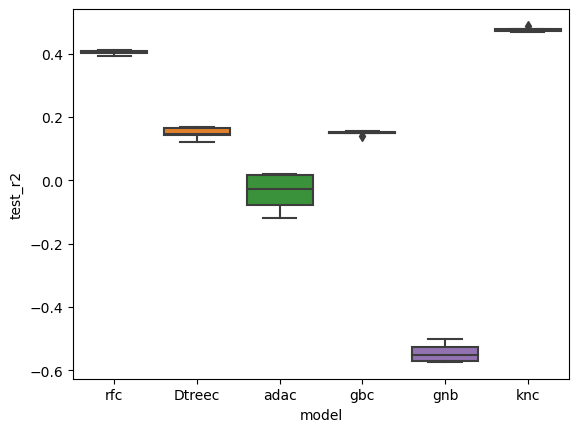

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model' ,y='test_r2', data=wynik_koncowy)

<Axes: xlabel='model', ylabel='test_r2'>

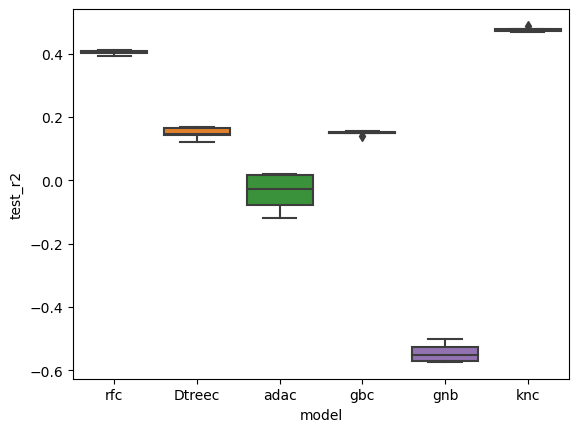

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model' ,y='test_r2', data=wynik_koncowy)

<Axes: xlabel='model', ylabel='test_accuracy'>

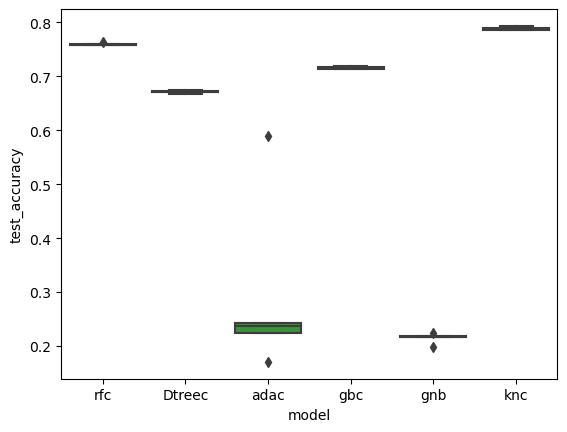

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model' ,y='test_accuracy', data=wynik_koncowy)

In [27]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

<Axes: xlabel='model', ylabel='test_f1'>

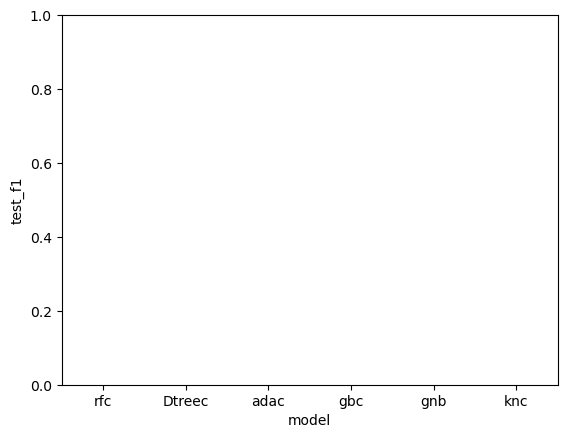

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model' ,y='test_f1', data=wynik_koncowy)

<Axes: xlabel='model', ylabel='test_balanced_accuracy'>

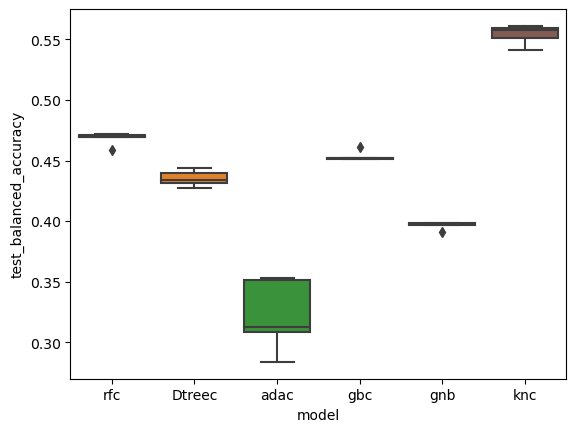

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model' ,y='test_balanced_accuracy', data=wynik_koncowy)

'roc_auc', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted'

<Axes: xlabel='model', ylabel='test_roc_auc'>

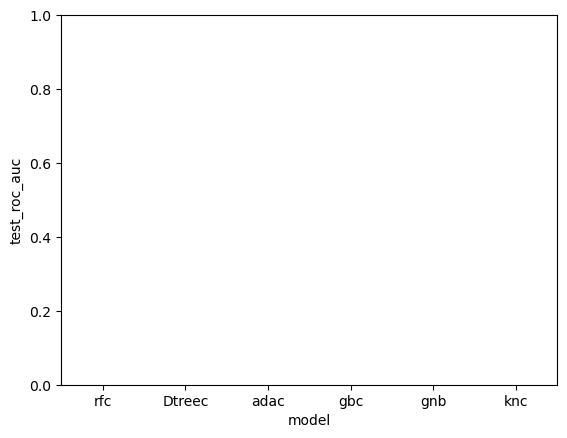

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model' ,y='test_roc_auc', data=wynik_koncowy)

<Axes: xlabel='model', ylabel='test_roc_auc_ovo'>

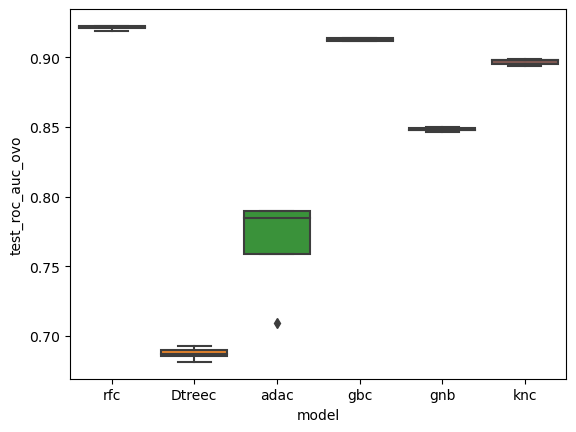

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model' ,y='test_roc_auc_ovo', data=wynik_koncowy)

<Axes: xlabel='model', ylabel='test_roc_auc_ovr_weighted'>

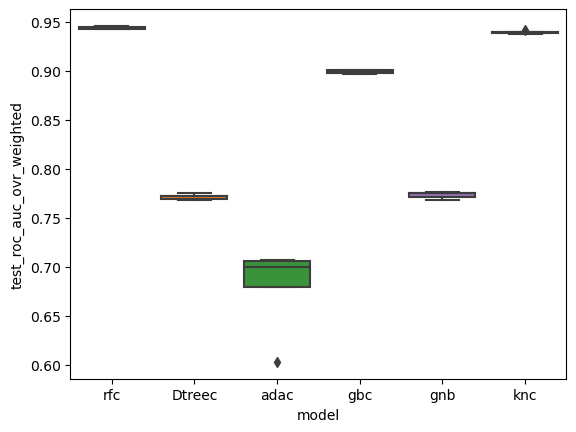

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model' ,y='test_roc_auc_ovr_weighted', data=wynik_koncowy)

<Axes: xlabel='model', ylabel='test_roc_auc_ovo_weighted'>

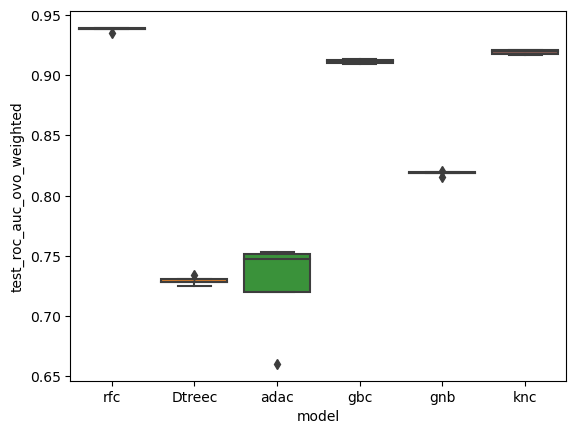

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model' ,y='test_roc_auc_ovo_weighted', data=wynik_koncowy)

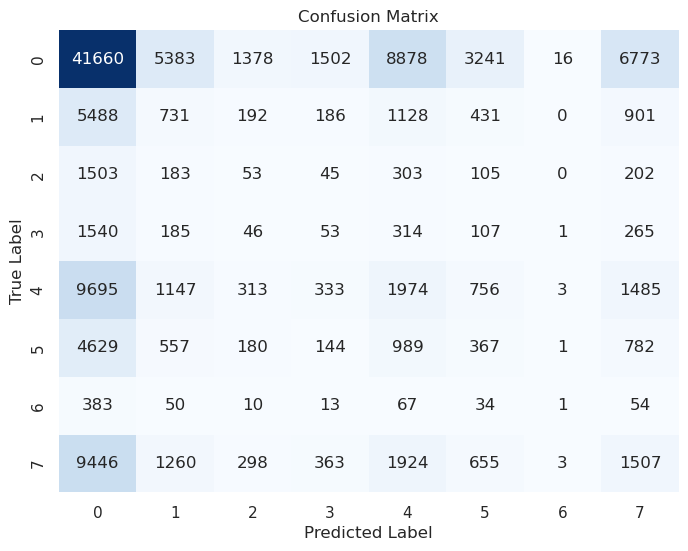

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(f_y_train, df.Pred6.head(122216).to_numpy())
# Set the context for the plot
sns.set(context='notebook', style='whitegrid')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title (optional)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

### Test Balanced Data

In [3]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.8 MB/s eta 0:00:00a 0:00:01


In [9]:
import warnings
import os
import cupy as cp
import pandas as pd
import cudf
import dask_cudf
import pandas as pd
from io import StringIO
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
df = cudf.read_csv('DaneModelTMP.csv', delimiter=',')

In [12]:
df = df.to_pandas()

In [23]:
# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

from collections import Counter

#from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.datasets import make_imbalance
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss

print(__doc__)

RANDOM_STATE = 42

# Create a folder to fetch the dataset
X, y = make_imbalance(
    df[['Pora','Zachm6', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
    'Wiatr_W', 'TemperaturaPowietrza', 'DeltaTemp6','DeltaTempRosy6', 'TemperaturaPunktuRosy', \
    'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', \
    'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
    'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
    'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
    'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
    'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
    'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
    'Przelotny_S']],
    df.Pred6,
    sampling_strategy={0:3000, 1: 3000, 2: 3000, 3: 3000, 4: 3000, 5: 3000, 6: 777, 7: 3000},
    random_state=RANDOM_STATE,
    
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

# Create a pipeline
pipeline = make_pipeline(NearMiss(version=2), StandardScaler(), LogisticRegression())
pipeline.fit(X_train, y_train)

# Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

Automatically created module for IPython interactive environment
Training target statistics: Counter({7: 2266, 4: 2252, 3: 2248, 1: 2241, 5: 2238, 2: 2216, 0: 1909, 6: 587})
Testing target statistics: Counter({2: 784, 5: 762, 1: 759, 3: 752, 4: 748, 7: 734, 0: 591, 6: 190})
                   pre       rec       spe        f1       geo       iba       sup

          0       0.49      0.25      0.97      0.33      0.49      0.22       591
          1       0.63      0.48      0.95      0.54      0.67      0.43       759
          2       0.73      0.30      0.98      0.43      0.55      0.28       784
          3       0.34      0.97      0.70      0.51      0.82      0.70       752
          4       0.40      0.32      0.92      0.35      0.54      0.27       748
          5       0.67      0.36      0.97      0.46      0.59      0.33       762
          6       0.29      0.68      0.94      0.41      0.80      0.62       190
          7       0.38      0.29      0.92      0.33      0.

In [ ]:
X, y = make_imbalance(
    df8[['Pora','Zachm6', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
    'Wiatr_W', 'TemperaturaPowietrza', 'DeltaTemp6','DeltaTempRosy6', 'TemperaturaPunktuRosy', \
    'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', \
    'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
    'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
    'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
    'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
    'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
    'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
    'Przelotny_S']],
    df8.Pred6,
    sampling_strategy={0:3000, 1: 3000, 2: 3000, 3: 3000, 4: 3000, 5: 3000, 6: 777, 7: 3000},
    random_state=RANDOM_STATE,
    
)

In [14]:
import numpy as np
import warnings
import cuml
warnings.filterwarnings("ignore")
from sklearn.ensemble import (RandomForestClassifier as RandomForestClassifier_gpu)
from sklearn.ensemble import (StackingClassifier as StackingClassifier_gpu)
from sklearn.tree import (DecisionTreeClassifier as DecisionTreeClassifier_gpu)
from sklearn.metrics import roc_curve, auc, roc_auc_score, balanced_accuracy_score, f1_score
from cuml.naive_bayes import GaussianNB
from cuml.cluster import DBSCAN
from cuml import SVC
from sklearn.ensemble import (GradientBoostingClassifier as GradientBoostingClassifier_gpu)
from cuml.svm import LinearSVC
from cuml.neighbors import (KNeighborsClassifier as KNeighborsClassifier_gpu)
from sklearn.ensemble import (AdaBoostClassifier as AdaBoostClassifier_gpu)
from cuml import MultinomialNB
from sklearn import model_selection
# from cuml.model_selection.model_selection import *
from cuml.model_selection import train_test_split
from cuml.linear_model import Lasso
from cuml.common.device_selection import using_device_type, set_global_device_type
# cuml.set_global_output_type('cudf')

# Create instances of the estimators
rf = RandomForestClassifier_gpu()
dtree = DecisionTreeClassifier_gpu()
gnb = GaussianNB()
dbscan = DBSCAN()  # Assuming you want to use DBSCAN as an estimator, which is unusual
knc3 = KNeighborsClassifier_gpu(n_neighbors=3)
knc15 = KNeighborsClassifier_gpu(n_neighbors=15)
knc11 = KNeighborsClassifier_gpu(n_neighbors=11)
knc7 = KNeighborsClassifier_gpu(n_neighbors=7)
knc5 = KNeighborsClassifier_gpu(n_neighbors=5)
la = Lasso()
svc = SVC()
lsvc = LinearSVC()
nbc = GaussianNB()
adac = AdaBoostClassifier_gpu()
mnb = MultinomialNB()
gbc = GradientBoostingClassifier_gpu()

# List of (name, estimator) tuples
def TestowanieModeli(X,y, out_dtype='float64'):
    dfs=[]
    wyniki=[]
    lista_estymatorow = [
        ('rfc', rf),
        ('Dtreec', dtree),
        ('adac', adac),
        ('gbc', gbc),
        ('gnb', gnb),
        ('knc3', knc3),
        ('knc15', knc15),
        ('knc11', knc11),
        ('knc7', knc7),
        ('knc5', knc5),
        
        # ('mnb', mnb),
        # ('la', la)
    ]

# Create the StackingClassifier
    miary=['accuracy','r2', 'balanced_accuracy', 'f1_micro', 'f1_macro', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted']
    for nazwa, model in lista_estymatorow:
        podzial=model_selection.KFold(n_splits=5,shuffle=True,random_state=125)
        with using_device_type('gpu'):
            # history = model.fit(X,y)
            cv_wynik=model_selection.cross_validate(model,X,y,cv= podzial,scoring= miary, verbose=1)
            wyniki.append(cv_wynik)
            df=pd.DataFrame(cv_wynik)
            df['model']= nazwa
            dfs.append(df)
    # model = stack_clf = StackingClassifier_gpu(estimators=lista_estymatorow)
    final=pd.concat(dfs)
    return final, cv_wynik, lista_estymatorow

# y = []

# X, y = df[['Pora','Zachm6', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
# 'Wiatr_W', 'TemperaturaPowietrza', 'DeltaTemp6','DeltaTempRosy6', 'TemperaturaPunktuRosy', \
# 'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', \
# 'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
# 'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
# 'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
# 'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
# 'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
# 'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
# 'Przelotny_S']], df.Pred6

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# f_X_train = X_train.to_numpy()
# f_y_train = y_train.to_numpy()

# f_X_train = f_X_train.astype(np.float64)
# f_y_train = f_y_train.astype(np.float64)

wynik_koncowy, cv_wynik, lista_estymatorow = TestowanieModeli(X_train, y_train, out_dtype='float64')
print(wynik_koncowy)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


../../thread/thread_load.cuh(36): warning: cuda.h: [jitify] File not found
../../thread/thread_store.cuh(36): warning: cuda.h: [jitify] File not found


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[I] [17:25:15.543310] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:16.096357] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:16.213614] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:16.330685] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:16.449761] Unused keyword parameter: n_jobs during cuML estimator initialization


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[I] [17:25:16.564669] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:16.680509] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:16.803550] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:16.919732] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:17.036273] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:17.157396] Unused keyword parameter: n_jobs during cuML estimator initialization


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[I] [17:25:17.272406] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:17.397902] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:17.525140] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:17.646892] Unused keyword parameter: n_jobs during cuML estimator initialization


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[I] [17:25:17.776421] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:17.896209] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:18.014716] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:18.134115] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:18.253112] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:18.372687] Unused keyword parameter: n_jobs during cuML estimator initialization


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[I] [17:25:18.486683] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:18.614827] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:18.730709] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [17:25:18.845341] Unused keyword parameter: n_jobs during cuML estimator initialization
    fit_time  score_time  test_accuracy   test_r2  test_balanced_accuracy  \
0   1.993624    0.212839       0.652882  0.146070                0.624431   
1   2.035390    0.210838       0.653509  0.129942                0.626024   
2   2.062043    0.234087       0.649326  0.154130                0.617985   
3   2.067269    0.230689       0.665935  0.174406                0.636904   
4   2.105668    0.205431       0.663115  0.175255                0.632590   
0   0.171233    0.087510       0.517857 -0.234225                0.488477   
1   0.169886    0.081783       0.531328 -0.218636                0.503702   
2   0.166462    

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


<Axes: xlabel='model', ylabel='test_r2'>

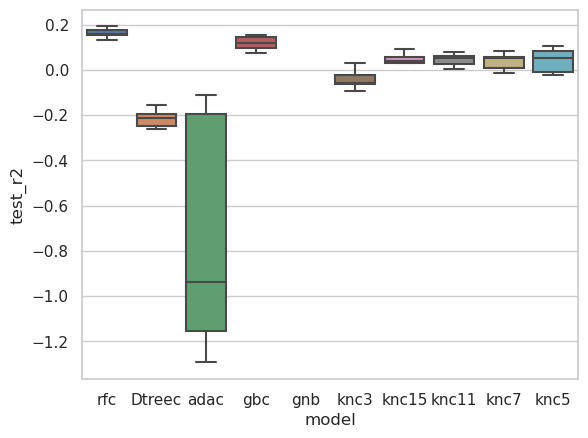

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model' ,y='test_r2', data=wynik_koncowy)

<Axes: xlabel='model', ylabel='test_f1_micro'>

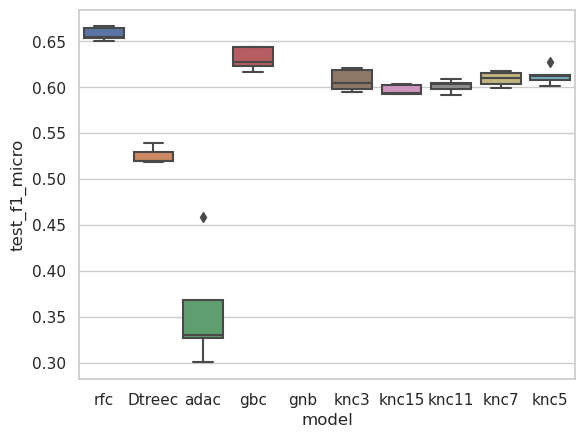

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model' ,y='test_f1_micro', data=wynik_koncowy)

<Axes: xlabel='model', ylabel='test_f1_macro'>

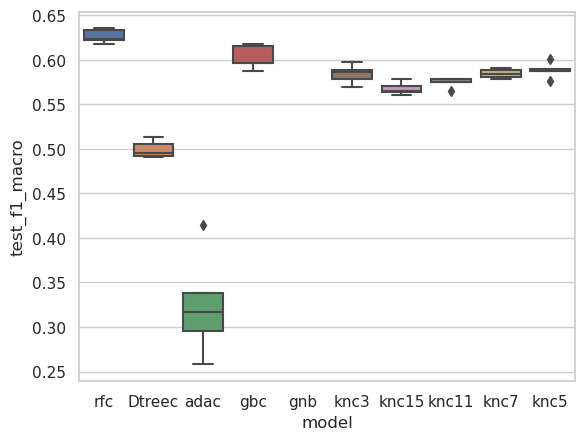

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model' ,y='test_f1_macro', data=wynik_koncowy)

<Axes: xlabel='model', ylabel='test_balanced_accuracy'>

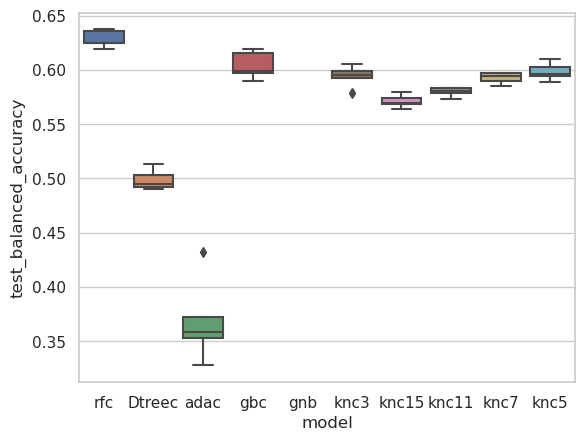

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model' ,y='test_balanced_accuracy', data=wynik_koncowy)

<Axes: xlabel='model', ylabel='test_accuracy'>

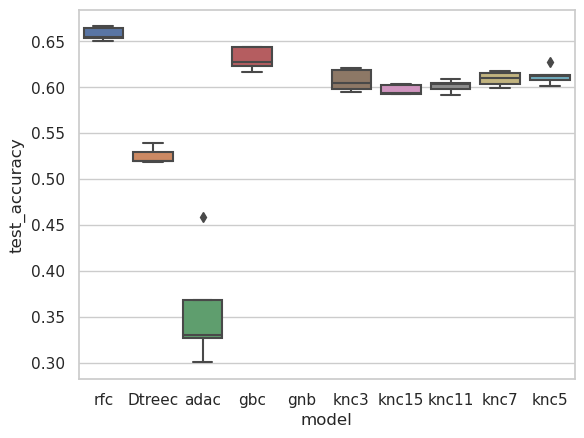

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model' ,y='test_accuracy', data=wynik_koncowy)

<Axes: xlabel='model', ylabel='test_roc_auc_ovo_weighted'>

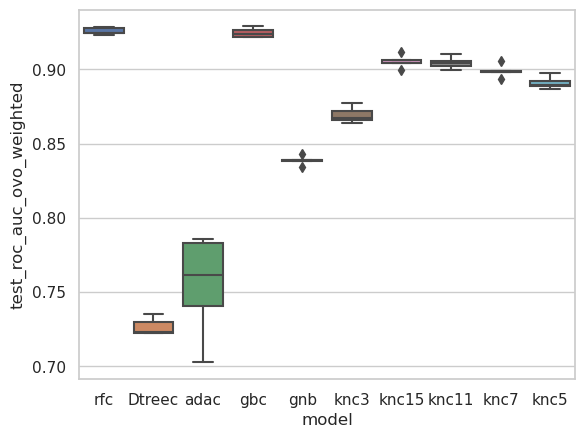

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model' ,y='test_roc_auc_ovo_weighted', data=wynik_koncowy)

<Axes: xlabel='model', ylabel='test_roc_auc_ovr_weighted'>

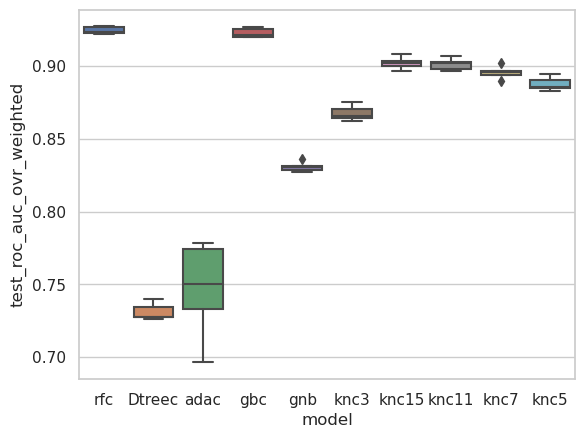

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model' ,y='test_roc_auc_ovr_weighted', data=wynik_koncowy)

<Axes: xlabel='model', ylabel='test_roc_auc_ovo'>

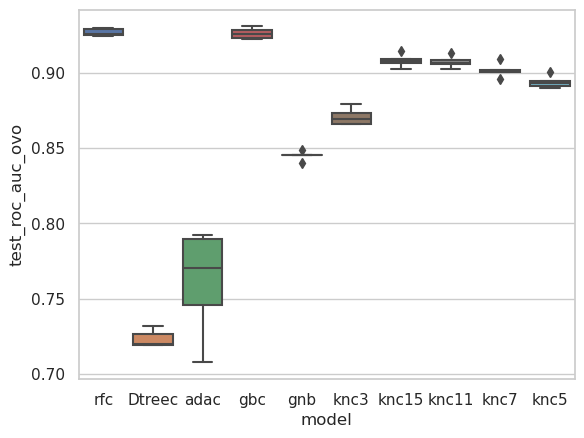

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model' ,y='test_roc_auc_ovo', data=wynik_koncowy)

### Predykcja Pogody mniej kolumn

In [10]:
import warnings
#import cudf
import pandas as pd
from io import StringIO
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
df = pd.read_csv('DaneModelTMP_4klasy.csv', delimiter=';')

In [11]:
df

czas        data  Pora  miesiac  Widz3  Widz6    Zachm3  \
0       06.08.2013 04:00  06.08.2013     1        8  30000  30000  0.000000   
1       06.08.2013 08:00  06.08.2013     2        8  20000  23333  1.000000   
2       06.08.2013 12:00  06.08.2013     3        8  30000  26666  2.333333   
3       06.08.2013 16:00  06.08.2013     4        8  30000  30000  2.666666   
4       06.08.2013 20:00  06.08.2013     5        8  30000  30000  2.000000   
...                  ...         ...   ...      ...    ...    ...       ...   
152765  21.12.2022 23:00  21.12.2022     5       12   2266   3216  8.000000   
152766  22.12.2022 00:00  22.12.2022     0       12   2533   2883  8.000000   
152767  22.12.2022 01:00  22.12.2022     0       12   2800   2750  8.000000   
152768  22.12.2022 02:00  22.12.2022     0       12   2500   2383  8.000000   
152769  22.12.2022 03:00  22.12.2022     0       12   1900   2216  8.000000   

          Zachm6   ZachmN3   ZachmN6  ...  OpadM_E  OpadM_N  OpadM_S  \
0       0.000000  0.000000  0.000000  ...        0        0        0   
1       0.500000  0.000000  0.000000  ...        0        0        0   
2       1.833333  1.333333  0.833333  ...        0        0        0   
3       2.666666  1.666666  1.666666  ...        0        0        0   
4       2.166666  1.000000  1.166666  ...        0        0        0   
...          ...       ...       ...  ...      ...      ...      ...   
152765  8.000000  8.000000  7.666666  ...        0        0        0   
152766  8.000000  7.666666  7.666666  ...        0        0        0   
152767  8.000000  7.333333  7.666666  ...        0        0        0   
152768  8.000000  7.000000  7.500000  ...        0        0        0   
152769  8.000000  7.333333  7.500000  ...        0        0        0   

        Przelotny_W  Przelotny_E  Przelotny_N  Przelotny_S  Pred3  Pred6  \
0                 0            0            0            0     -1      0   
1                 0            0            0            0     -1      0   
2                 0            0            0            0     -1      0   
3                 0            0            0            0     -1      0   
4                 0            0            0            0     -1      0   
...             ...          ...          ...          ...    ...    ...   
152765            1            0            0            0     -1      2   
152766            0            0            0            0     -1      2   
152767            0            0            1            0     -1      2   
152768            0            0            1            0     -1      2   
152769            0            0            1            0     -1      2   

            id  
0          169  
1          170  
2          171  
3          172  
4          173  
...        ...  
152765  180009  
152766  180010  
152767  180011  
152768  180012  
152769  180013  

[152770 rows x 62 columns]

In [5]:
import numpy as np
import warnings
import cuml
warnings.filterwarnings("ignore")
from sklearn.ensemble import (RandomForestClassifier as RandomForestClassifier_gpu)
from sklearn.ensemble import (StackingClassifier as StackingClassifier_gpu)
from sklearn.tree import (DecisionTreeClassifier as DecisionTreeClassifier_gpu)
from sklearn.metrics import roc_curve, auc, roc_auc_score, balanced_accuracy_score, f1_score
from cuml.naive_bayes import GaussianNB
from cuml.cluster import DBSCAN
from cuml import SVC
from sklearn.ensemble import (GradientBoostingClassifier as GradientBoostingClassifier_gpu)
from cuml.svm import LinearSVC
from cuml.neighbors import (KNeighborsClassifier as KNeighborsClassifier_gpu)
from sklearn.ensemble import (AdaBoostClassifier as AdaBoostClassifier_gpu)
from cuml import MultinomialNB
from sklearn import model_selection
# from cuml.model_selection.model_selection import *
from cuml.model_selection import train_test_split
from cuml.linear_model import Lasso
from cuml.common.device_selection import using_device_type, set_global_device_type
# cuml.set_global_output_type('cudf')

# Create instances of the estimators
rf = RandomForestClassifier_gpu()
dtree = DecisionTreeClassifier_gpu()
gnb = GaussianNB()
dbscan = DBSCAN()  # Assuming you want to use DBSCAN as an estimator, which is unusual
knc3 = KNeighborsClassifier_gpu(n_neighbors=3)
knc15 = KNeighborsClassifier_gpu(n_neighbors=15)
knc11 = KNeighborsClassifier_gpu(n_neighbors=11)
knc7 = KNeighborsClassifier_gpu(n_neighbors=7)
knc5 = KNeighborsClassifier_gpu(n_neighbors=5)
la = Lasso()
svc = SVC()
lsvc = LinearSVC()
nbc = GaussianNB()
adac = AdaBoostClassifier_gpu()
mnb = MultinomialNB()
gbc = GradientBoostingClassifier_gpu()

# List of (name, estimator) tuples
def TestowanieModeli(X,y, out_dtype='float64'):
    dfs=[]
    wyniki=[]
    lista_estymatorow = [
        ('rfc', rf),
        ('Dtreec', dtree),
        ('adac', adac),
        ('gbc', gbc),
        ('gnb', gnb),
        ('knc3', knc3),
        ('knc15', knc15),
        ('knc11', knc11),
        ('knc7', knc7),
        ('knc5', knc5),
        
        # ('mnb', mnb),
        # ('la', la)
    ]

# Create the StackingClassifier
    miary=['accuracy','r2', 'balanced_accuracy', 'f1_micro', 'f1_macro', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted']
    for nazwa, model in lista_estymatorow:
        podzial=model_selection.KFold(n_splits=5,shuffle=True,random_state=125)
        with using_device_type('gpu'):
            # history = model.fit(X,y)
            cv_wynik=model_selection.cross_validate(model,X,y,cv= podzial,scoring= miary, verbose=1)
            wyniki.append(cv_wynik)
            df=pd.DataFrame(cv_wynik)
            df['model']= nazwa
            dfs.append(df)
    # model = stack_clf = StackingClassifier_gpu(estimators=lista_estymatorow)
    final=pd.concat(dfs)
    return final, cv_wynik, lista_estymatorow

# y = []

# X, y = df[['Pora','Zachm6', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
# 'Wiatr_W', 'TemperaturaPowietrza', 'DeltaTemp6','DeltaTempRosy6', 'TemperaturaPunktuRosy', \
# 'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', \
# 'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
# 'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
# 'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
# 'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
# 'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
# 'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
# 'Przelotny_S']], df.Pred6

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# f_X_train = X_train.to_numpy()
# f_y_train = y_train.to_numpy()

# f_X_train = f_X_train.astype(np.float64)
# f_y_train = f_y_train.astype(np.float64)

wynik_koncowy, cv_wynik, lista_estymatorow = TestowanieModeli(X_train, y_train, out_dtype='float64')
print(wynik_koncowy)

/home/student-wwsi/anaconda3/envs/rapids-23.12/lib/python3.9/site-packages/cupy/_environment.py:447: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  Reason: {type(exc).__name__} ({str(exc)})


ValueError: cupy_backends.cuda._softlink.SoftLink size changed, may indicate binary incompatibility. Expected 56 from C header, got 40 from PyObject

### Sieci Neuronowe

In [18]:
import gc
gc.collect()

216

In [25]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [29]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2023-12-20 10:47:46.880883: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-20 10:47:46.881028: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-20 10:47:46.881075: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-20 10:47:46.881298: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-20 10:47:46.881331: I tensorflow/core/co

In [30]:
import torch
torch.cuda.empty_cache()
from numba import cuda
cuda.select_device(0)
cuda.close()
cuda.select_device(0)

<weakproxy at 0x7f96f9913290 to Device at 0x7f93830cd720>

In [3]:
import pandas as pd
import numpy as np
from pandas import read_csv

from imblearn.datasets import make_imbalance
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss


In [4]:
# Load the GunPoint dataset

RANDOM_STATE = 42

X, y = make_imbalance(
    df[['Pora','Zachm6', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
    'Wiatr_W', 'TemperaturaPowietrza', 'DeltaTemp6','DeltaTempRosy6', 'TemperaturaPunktuRosy', \
    'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', \
    'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
    'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
    'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
    'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
    'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
    'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
    'Przelotny_S']],
    df.Pred6,
    sampling_strategy={0: 2500, 1: 3000, 2: 3000, 3: 3000, 4: 3000, 5: 3000, 6: 777, 7: 3000},
    random_state=RANDOM_STATE,
)
# Wyświetlenie wczytywanych danych 
print(X)
# https://pyts.readthedocs.io/en/stable/auto_examples/image/plot_dataset_gaf.html
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint
import numpy as np


# Get the Gramian angular summation fields for all the time series
gaf = GramianAngularField()
X_gaf = gaf.fit_transform(X)

# Plot the 50 Gramian angular fields
fig = plt.figure(figsize=(30, 20))

grid = ImageGrid(fig, 111, nrows_ncols=(20, 20), axes_pad=0.1, share_all=True,
                 cbar_mode='single')
for i, ax in enumerate(grid):
    im = ax.imshow(X_gaf[i], cmap='rainbow', origin='lower', vmin=-1., vmax=1.)
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.colorbar(im, cax=grid.cbar_axes[0])
ax.cax.toggle_label(True)

fig.suptitle("Gramian angular summation fields for the 50 time series in the "
             "'GunPoint' dataset", y=0.92)

plt.show()

        Pora    Zachm6   ZachmN6  Wiatr_N  Wiatr_E  Wiatr_S  Wiatr_W  \
111029     3  6.666666  4.666666   0.0000   0.0000   1.7101   4.6985   
65525      5  4.333333  2.166666   0.0000   1.7321   1.0000   0.0000   
98020      0  0.000000  0.000000   1.0000   0.0000   0.0000   0.0000   
114126     5  6.833333  6.000000   0.0000   0.0000   0.0000   7.0000   
4471       0  4.166666  4.166666   0.3473   0.0000   0.0000   1.9696   
...      ...       ...       ...      ...      ...      ...      ...   
12057      3  6.666666  5.500000   0.0000   0.8660   0.5000   0.0000   
67719      1  5.000000  2.166666   0.0000   0.0000   0.6840   1.8794   
119534     2  7.166666  7.000000   2.0000   0.0000   0.0000   0.0000   
85824      3  4.833333  4.666666   0.0000   0.0000   0.5209   2.9544   
147769     2  7.833333  6.833333   0.0000   0.0000   0.6428   0.7660   

        TemperaturaPowietrza  DeltaTemp6  DeltaTempRosy6  ...  Snieg_N  \
111029                  12.7         1.6           -11.8  ...

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f7fd6e4cdc0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f7fc3f09d80> (for post_execute):


KeyboardInterrupt: 

In [ ]:
import numpy as np
from keras.layers import Input, UpSampling2D
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Input
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Input
from keras.models import Model
import tensorflow as tf


# Tworzenie przykładowej tablicy GAF znormalizowanej
# create a numpy array
a = X_gaf

# calculate the minimum and maximum values
min_val = a.min()
max_val = a.max()

# normalize the array using min-max normalization
normalized_array = (a - min_val) / (max_val - min_val)

#print(normalized_array)

# Załóżmy, że masz tablicę 2D o wymiarach (num_samples, num_features)
num_samples = len(X_gaf)
num_features = X_gaf.shape[1]
# normalized_array
x_train, x_test = train_test_split(normalized_array, test_size=0.2)  # normalized_array
# normal clean data
# x_train, x_test = train_test_split(X_gaf, test_size=0.2)

# Tworzenie modelu autoenkodera
input_data = Input(shape=(num_features,))  # Wejście jako tablica numpy
x = Dense(128, activation='sigmoid')(input_data)  # Możesz dostosować tę warstwę do danych
encoded = Dense(128, activation='relu')(x)
x = Dense(16, activation='sigmoid')(encoded)
encoded = Dense(16, activation='relu')(x)
x = Dense(32, activation='sigmoid')(encoded)
encoded = Dense(32, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(64, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(64, activation='relu')(x)
x = Dense(128, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(256, activation='sigmoid')(encoded)
encoded = Dense(256, activation='relu')(x)
x = Dense(512, activation='sigmoid')(encoded)
encoded = Dense(512, activation='relu')(x)
x = Dense(1024, activation='sigmoid')(encoded)
encoded = Dense(1024, activation='relu')(x)
x = Dense(2048, activation='sigmoid')(encoded)
encoded = Dense(2048, activation='relu')(x)
x = Dense(4096, activation='sigmoid')(encoded)
encoded = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='sigmoid')(encoded)
encoded = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='sigmoid')(encoded)
encoded = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='sigmoid')(encoded)
encoded = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='sigmoid')(encoded)
encoded = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='sigmoid')(encoded)
encoded = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='sigmoid')(encoded)
encoded = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='sigmoid')(encoded)
encoded = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='sigmoid')(encoded)
encoded = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='sigmoid')(encoded)
encoded = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='sigmoid')(encoded)
encoded = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='sigmoid')(encoded)
encoded = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='sigmoid')(encoded)
encoded = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='sigmoid')(encoded)
encoded = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='sigmoid')(encoded)
encoded = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='sigmoid')(encoded)
encoded = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='sigmoid')(encoded)
encoded = Dense(4096, activation='relu')(x)
x = Dense(512, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(512, activation='sigmoid')(encoded)
encoded = Dense(256, activation='relu')(x)
x = Dense(1024, activation='sigmoid')(encoded)
encoded = Dense(512, activation='relu')(x)
x = Dense(1024, activation='sigmoid')(encoded)
encoded = Dense(512, activation='relu')(x)
x = Dense(512, activation='sigmoid')(encoded)
encoded = Dense(256, activation='relu')(x)
x = Dense(512, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(512, activation='sigmoid')(encoded)
encoded = Dense(256, activation='relu')(x)
x = Dense(1024, activation='sigmoid')(encoded)
encoded = Dense(512, activation='relu')(x)
x = Dense(1024, activation='sigmoid')(encoded)
encoded = Dense(512, activation='relu')(x)
x = Dense(512, activation='sigmoid')(encoded)
encoded = Dense(256, activation='relu')(x)
x = Dense(512, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(512, activation='sigmoid')(encoded)
encoded = Dense(256, activation='relu')(x)
x = Dense(1024, activation='sigmoid')(encoded)
encoded = Dense(512, activation='relu')(x)
x = Dense(1024, activation='sigmoid')(encoded)
encoded = Dense(512, activation='relu')(x)
x = Dense(512, activation='sigmoid')(encoded)
encoded = Dense(256, activation='relu')(x)
x = Dense(512, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(512, activation='sigmoid')(encoded)
encoded = Dense(256, activation='relu')(x)
x = Dense(1024, activation='sigmoid')(encoded)
encoded = Dense(512, activation='relu')(x)
x = Dense(1024, activation='sigmoid')(encoded)
encoded = Dense(512, activation='relu')(x)
x = Dense(512, activation='sigmoid')(encoded)
encoded = Dense(256, activation='relu')(x)
x = Dense(512, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
x = Dense(64, activation='sigmoid')(encoded)
encoded = Dense(128, activation='relu')(x)
decoded = Dense(num_features, activation='sigmoid')(x)

autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='SGD', metrics=[tf.keras.metrics.RootMeanSquaredError()], loss='mean_squared_error')
autoencoder.summary()

# Trenowanie modelu
history = autoencoder.fit(normalized_array, normalized_array, epochs=10, batch_size=32, verbose=1)


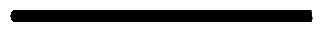

In [ ]:
# calculate the minimum and maximum values
min_val = x_test.min()
max_val = x_test.max()

# na podstawie:
#   https://towardsdatascience.com/rgb-gaf-image-a-possible-solution-to-one-weak-point-of-gramian-angular-field-imaging-ffc6b31edfbe

# normalize the array using min-max normalization
normalized_array_test = (x_test - min_val) / (max_val - min_val)

num_test_data = len(normalized_array_test)

# Display the generated GAF images
plt.figure(figsize=(15, 3))
for i in range(num_test_data):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(normalized_array_test[i], cmap='rainbow', origin='lower')
    plt.title(f'GAF {i+1}')
    plt.axis('off')
# plt.tight_layout()
plt.show()

# Verify the shape of the GAF dataset
print("Shape of GAF dataset:", normalized_array_test.shape)

# Define a function to format the elements
def format_element(element):
    return f"{element:.8f}"


# Przykład predykcji dla nowych danych
new_data = normalized_array_test # Nowe dane do predykcji
predicted_data = autoencoder.predict(new_data)

print("Nowe dane:")
print(np.vectorize(format_element)(new_data))
print("Przewidywane dane:")
print(np.vectorize(format_element)(predicted_data))

# Display the generated GAF images
import pandas as pd
df = pd.DataFrame(history.history)
df['accuracy'] = 1 - df['loss']
df['val_accuracy'] = 1 - df['root_mean_squared_error']
#%%

# Plot the loss and accuracy curves for training and validation
plt.plot(df['accuracy'], label='accuracy')
# plt.plot(df['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

# calculate accuracy on the prediction
import numpy as np

accuracy = sum(1 - df['loss']) / len(df['loss'])

print(f"Dokładność (Accuracy): {accuracy * 100:.2f}%")

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


2023-12-20 17:54:22.994108: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 17:54:22.994163: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 17:54:22.994192: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 17:54:22.999424: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-20 17:54:23.702399: W tensorflow/compiler/

        Pora    Zachm6   ZachmN6  Wiatr_N  Wiatr_E  Wiatr_S  Wiatr_W  \
111029     3  6.666666  4.666666   0.0000   0.0000   1.7101   4.6985   
65525      5  4.333333  2.166666   0.0000   1.7321   1.0000   0.0000   
98020      0  0.000000  0.000000   1.0000   0.0000   0.0000   0.0000   
114126     5  6.833333  6.000000   0.0000   0.0000   0.0000   7.0000   
4471       0  4.166666  4.166666   0.3473   0.0000   0.0000   1.9696   
...      ...       ...       ...      ...      ...      ...      ...   
12057      3  6.666666  5.500000   0.0000   0.8660   0.5000   0.0000   
67719      1  5.000000  2.166666   0.0000   0.0000   0.6840   1.8794   
119534     2  7.166666  7.000000   2.0000   0.0000   0.0000   0.0000   
85824      3  4.833333  4.666666   0.0000   0.0000   0.5209   2.9544   
147769     2  7.833333  6.833333   0.0000   0.0000   0.6428   0.7660   

        TemperaturaPowietrza  DeltaTemp6  DeltaTempRosy6  ...  Snieg_N  \
111029                  12.7         1.6           -11.8  ...

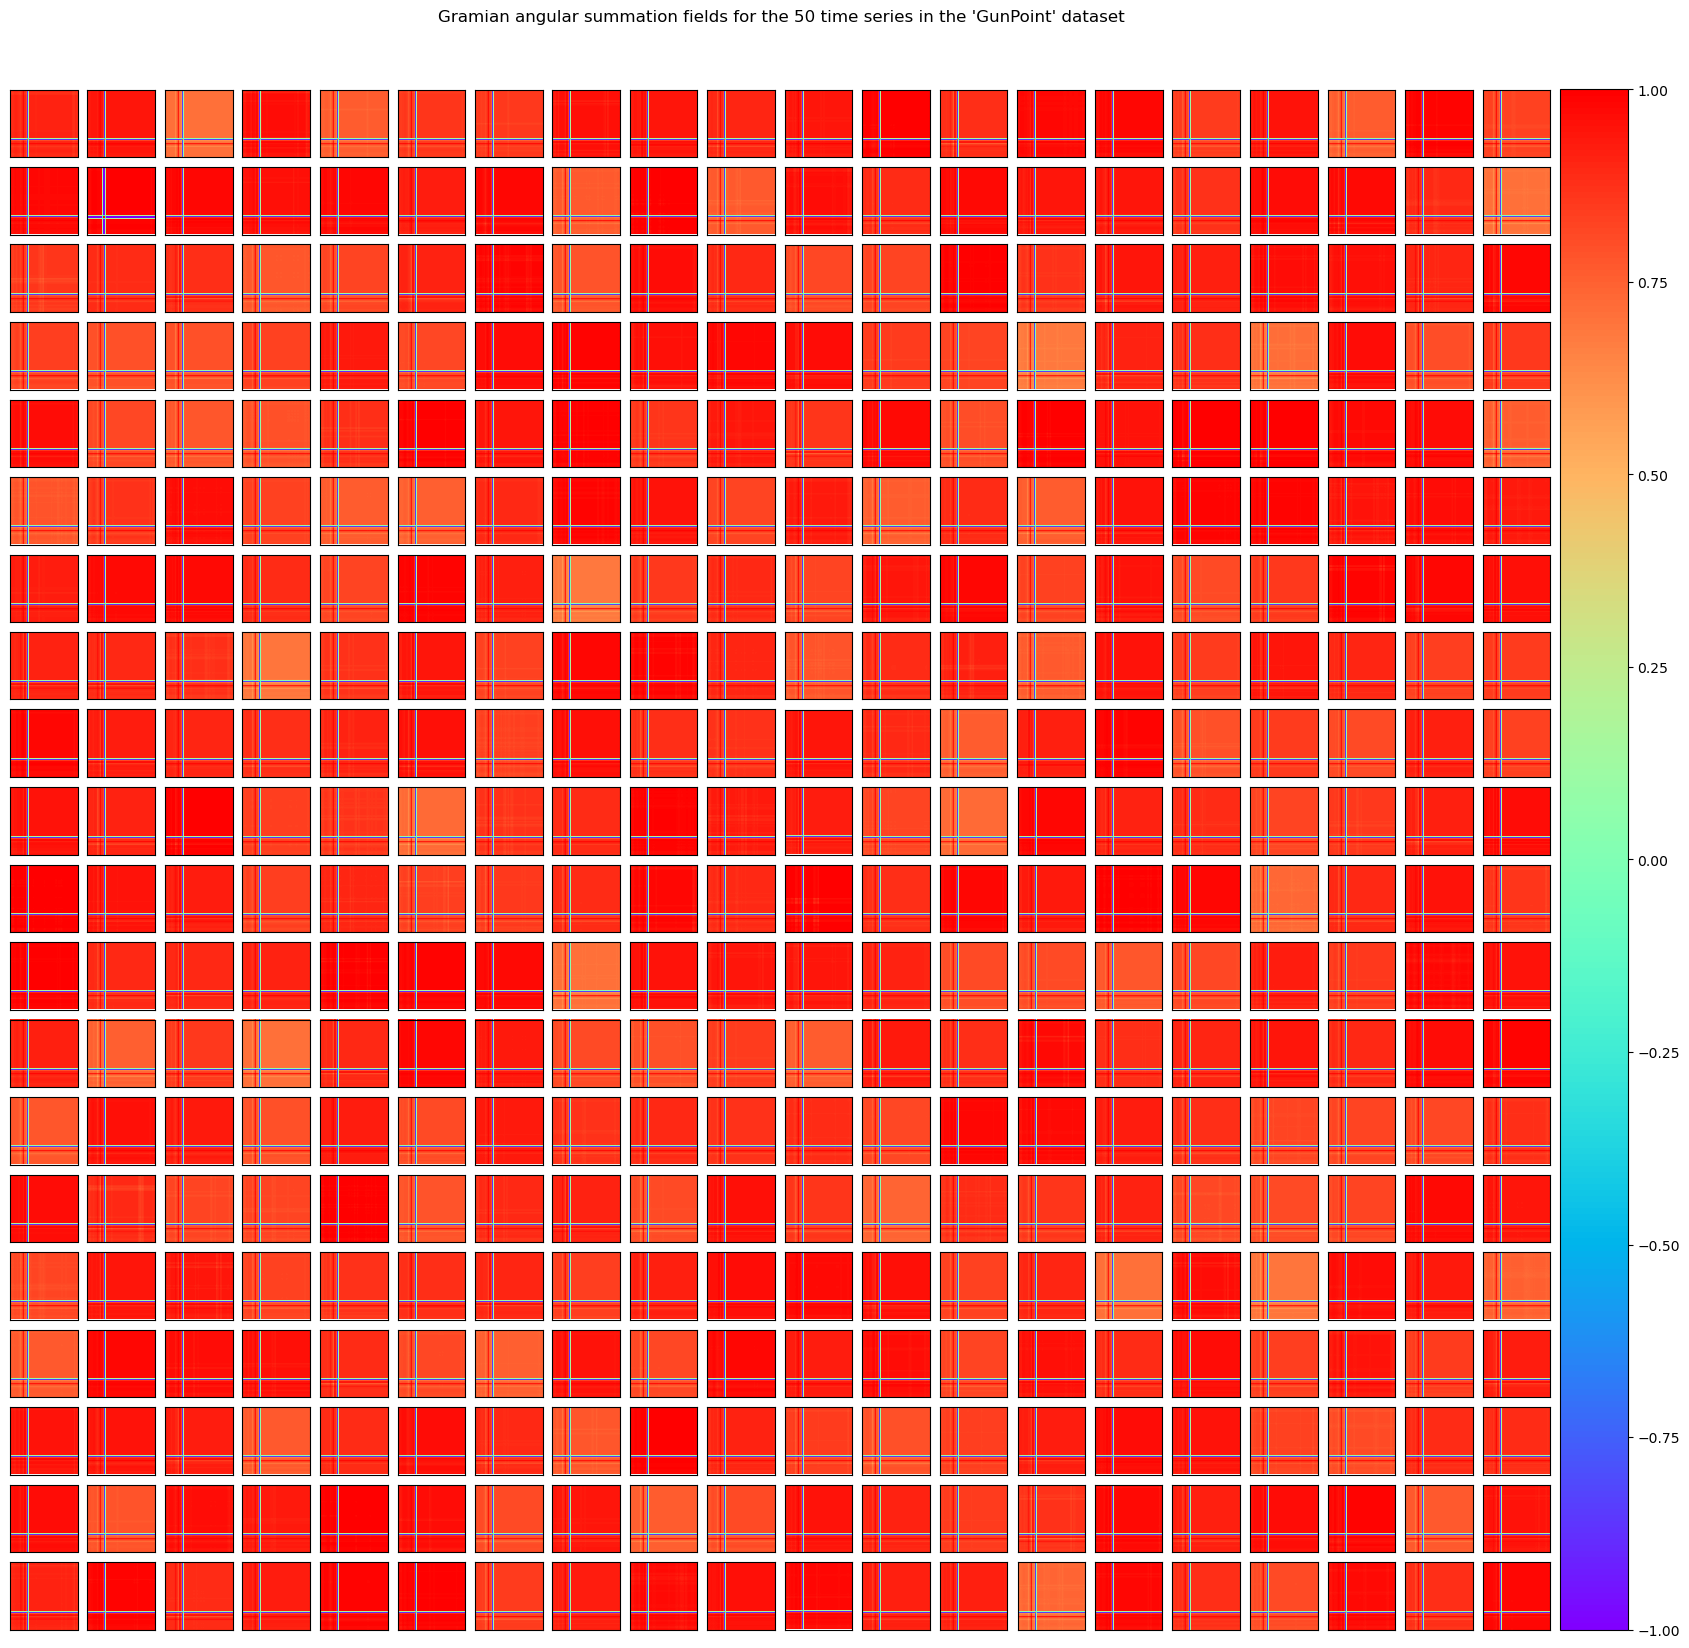

In [12]:
# Load the GunPoint dataset

RANDOM_STATE = 42

X, y = make_imbalance(
    df[['Pora','Zachm6', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
    'Wiatr_W', 'TemperaturaPowietrza', 'DeltaTemp6','DeltaTempRosy6', 'TemperaturaPunktuRosy', \
    'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', \
    'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
    'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
    'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
    'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
    'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
    'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
    'Przelotny_S']],
    df.Pred6,
    sampling_strategy={0: 2500, 1: 3000, 2: 3000, 3: 3000, 4: 3000, 5: 3000, 6: 777, 7: 3000},
    random_state=RANDOM_STATE,
)
# Wyświetlenie wczytywanych danych 
print(X)
# https://pyts.readthedocs.io/en/stable/auto_examples/image/plot_dataset_gaf.html
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint
import numpy as np

# Get the Gramian angular summation fields for all the time series
gaf = GramianAngularField()
X_gaf = gaf.fit_transform(X)
print(y)
#L_gaf = gaf.fit_transform(y)

# Plot the 50 Gramian angular fields
fig = plt.figure(figsize=(30, 20))

grid = ImageGrid(fig, 111, nrows_ncols=(20, 20), axes_pad=0.1, share_all=True,
                 cbar_mode='single')
for i, ax in enumerate(grid):
    im = ax.imshow(X_gaf[i], cmap='rainbow', origin='lower', vmin=-1., vmax=1.)
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.colorbar(im, cax=grid.cbar_axes[0])
ax.cax.toggle_label(True)

fig.suptitle("Gramian angular summation fields for the 50 time series in the "
             "'GunPoint' dataset", y=0.92)

plt.show()

In [42]:
!pip install numpy==1.24.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 19.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.6.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cugraph 23.6.2 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.6.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.6.0 requires cupy-cuda11x>=12.0.0, which is not installed.


In [50]:
y

111029    0
65525     0
98020     0
114126    0
4471      0
         ..
12057     7
67719     7
119534    7
85824     7
147769    7
Name: Pred6, Length: 21277, dtype: int64

In [51]:
# Załóżmy, że mamy listę tablic NumPy o różnych kształtach
uniform_arrays = [np.reshape(y, 2) for arr in y]
combined_array = np.stack(uniform_arrays)

ValueError: cannot reshape array of size 21277 into shape (2,)

In [44]:
L_gaf = gaf.fit_transform(y)

# Plot the 50 Gramian angular fields
fig = plt.figure(figsize=(30, 20))

grid = ImageGrid(fig, 111, nrows_ncols=(20, 20), axes_pad=0.1, share_all=True,
                 cbar_mode='single')
for i, ax in enumerate(grid):
    im = ax.imshow(L_gaf[i], cmap='rainbow', origin='lower', vmin=-1., vmax=1.)
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.colorbar(im, cax=grid.cbar_axes[0])
ax.cax.toggle_label(True)

fig.suptitle("Gramian angular summation fields for the 50 time series in the "
             "'GunPoint' dataset", y=0.92)

plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 ... 7 7 7].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# calculate the minimum and maximum values
min_val = a.min()
max_val = a.max()

# normalize the array using min-max normalization
normalized_train_array = (X_gaf - min_val) / (max_val - min_val)
normalized_label_array = (L_gaf - min_val) / (max_val - min_val)
#print(normalized_array)

# Załóżmy, że masz tablicę 2D o wymiarach (num_samples, num_features)
num_samples = len(X_gaf)
num_features = X_gaf.shape[1]
# normalized_array
x_train, x_test = train_test_split(normalized_train_array, test_size=0.2)  # normalized_array
# normal clean data
# x_train, x_test = train_test_split(X_gaf, test_size=0.2)


In [ ]:
model = Sequential([
    # Pierwsza warstwa konwolucyjna
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    
    # Druga warstwa konwolucyjna
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Trzecia warstwa konwolucyjna
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Przejście od konwolucji do pełnego połączenia
    Flatten(),
    
    # Warstwa ukryta
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    # Warstwa wyjściowa
    Dense(9, activation='softmax')  # Użyj 10 dla 10 klas ilość klas w danych dla modelu
])

In [ ]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = nodel.fit(normalized_train_array, normalized_label_array, epochs=10, batch_size=32, verbose=1)

In [ ]:
# calculate the minimum and maximum values
min_val = x_test.min()
max_val = x_test.max()

# na podstawie:
#   https://towardsdatascience.com/rgb-gaf-image-a-possible-solution-to-one-weak-point-of-gramian-angular-field-imaging-ffc6b31edfbe

# normalize the array using min-max normalization
normalized_array_test = (x_test - min_val) / (max_val - min_val)

num_test_data = len(normalized_array_test)

# Display the generated GAF images
plt.figure(figsize=(15, 3))
for i in range(num_test_data):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(normalized_array_test[i], cmap='rainbow', origin='lower')
    plt.title(f'GAF {i+1}')
    plt.axis('off')
# plt.tight_layout()
plt.show()

# Verify the shape of the GAF dataset
print("Shape of GAF dataset:", normalized_array_test.shape)

# Define a function to format the elements
def format_element(element):
    return f"{element:.8f}"


# Przykład predykcji dla nowych danych
new_data = normalized_array_test # Nowe dane do predykcji
predicted_data = autoencoder.predict(new_data)

print("Nowe dane:")
print(np.vectorize(format_element)(new_data))
print("Przewidywane dane:")
print(np.vectorize(format_element)(predicted_data))

# Display the generated GAF images
import pandas as pd
df = pd.DataFrame(history.history)
df['accuracy'] = 1 - df['loss']
df['val_accuracy'] = 1 - df['root_mean_squared_error']
#%%

# Plot the loss and accuracy curves for training and validation
plt.plot(df['accuracy'], label='accuracy')
# plt.plot(df['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

# calculate accuracy on the prediction
import numpy as np

accuracy = sum(1 - df['loss']) / len(df['loss'])

print(f"Dokładność (Accuracy): {accuracy * 100:.2f}%")

In [130]:
df['Pred6'].unique()

array([0, 1, 3, 7, 4, 2, 5, 6])

In [131]:
df = df.to_pandas()

AttributeError: 'DataFrame' object has no attribute 'to_pandas'

In [132]:
# X, y = df[['Pora', \
# 'Zachm6', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
# 'Wiatr_W', 'TemperaturaPowietrza', 'DeltaTemp6', \
# , 'DeltaTempRosy6', 'TemperaturaPunktuRosy', \
# 'Cisn3', 'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', 'Opady12', \
# 'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
# 'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
# 'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
# 'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
# 'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
# 'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
# 'Przelotny_S']], df.Pred6

In [133]:
df['Widz6_balance'] = (df.loc[df['Pred6'] == 4, 'Widz6']).astype(int)
df.loc[df['Pred6'] == 4, 'Widz6']

85        19166
86        15833
87        10000
88        10833
89         6166
          ...  
152758    14000
152759    12333
152760    10416
152761     8583
152762     6750
Name: Widz6, Length: 19599, dtype: int64

In [142]:
# Create a vectorizer and train it
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(df[['Pora','Zachm6', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
'Wiatr_W', 'TemperaturaPowietrza', 'DeltaTemp6','DeltaTempRosy6', 'TemperaturaPunktuRosy', \
'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', \
'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
'Przelotny_S']])

# Features are our matrix of tf-idf values
# labels are whether each recipe is Indian or not
X = matrix
y = df.Pred6

# How many are Indian?
y.value_counts()

0    85907
4    19599
7    19455
1    11269
5     9609
3     3148
2     3006
6      777
Name: Pred6, dtype: int64

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(df[['Pora','Zachm6', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
'Wiatr_W', 'TemperaturaPowietrza', 'DeltaTemp6','DeltaTempRosy6', 'TemperaturaPunktuRosy', \
'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', \
'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
'Przelotny_S']])
X = matrix
y = df.Pred6

In [137]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

ValueError: Found input variables with inconsistent numbers of samples: [48, 152770]

In [2]:
!pip install scikit-plot

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from numpy import argmax
import numpy as np
def build_and_test(X_tr, X_te, y_tr, y_te, class_weight=None, threshold=False):
    
    # Build and Plot PCA
    pca = PCA(n_components=2)
    pca.fit(X_tr.toarray())
    X_pca = pca.transform(X_tr.toarray())
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_tr, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()
    
    # Build and fit the model
    if class_weight:
        model = DecisionTreeClassifier(class_weight=class_weight)
    else:
        model = DecisionTreeClassifier()
    model.fit(X_tr, y_tr)
    
    # Test the model
    y_pred = model.predict(X_te)
    print('Precision score %s' % precision_score(y_te, y_pred, average='macro'))
    print('Recall score %s' % recall_score(y_te, y_pred, average='macro'))
    print('F1-score score %s' % f1_score(y_te, y_pred, average='macro'))
    # print('Accuracy score %s' % accuracy_score(y_te[:, df.index], y_pred))
    
    y_score = model.predict_proba(X_te)
    # fpr0, tpr0, thresholds = roc_curve(y_te, y_score[:, 1])
    # roc_auc0 = auc(fpr0, tpr0)
    
    # Calculate the best threshold
    best_threshold = None
    if threshold:
        J = tpr0 - fpr0
        ix = argmax(J) # take the value which maximizes the J variable
        best_threshold = thresholds[ix]
        # adjust score according to threshold.
        y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])
        
    
    # Plot metrics 
    plot_roc(y_te, y_score)
    plt.show()
    
    plot_precision_recall(y_te, y_score)
    plt.show()
    
    # plot_cumulative_gain(y_te, y_score)
    # plt.show()
    
    # plot_lift_curve(y_te, y_score)
    # plt.show()
    
    # Print a classification report
    print(classification_report(y_te,y_pred))
    return y_score
    # return roc_auc0,fpr0,tpr0, best_threshold, y_score

In [4]:
 y_score = build_and_test(X_train, X_test, y_train, y_test)

NameError: name 'X_train' is not defined

In [5]:
!pip install imblearn

In [6]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(k_neighbors=2)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/home/student-wwsi/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)

In [7]:
roc_auc_smote,fpr_smote,tpr_smote, _ = build_and_test(X_res, X_test, y_res, y_test)

NameError: name 'X_res' is not defined

In [68]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 581, 1: 581, 2: 581, 3: 581, 4: 581, 5: 581, 6: 581, 7: 581})
Testing target statistics: Counter({0: 25776, 7: 5915, 4: 5836, 1: 3374, 5: 2914, 3: 911, 2: 909, 6: 196})


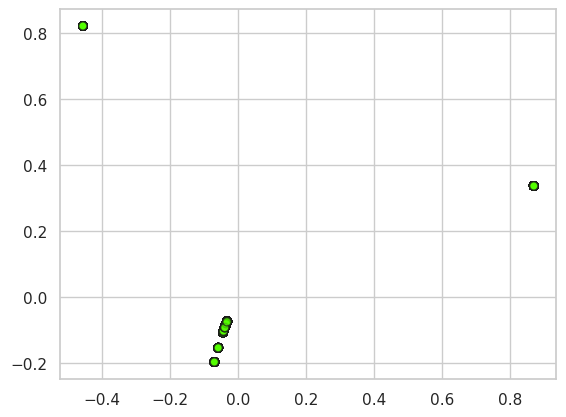

Precision score 0.18738367980594184
Recall score 0.232722090125129
F1-score score 0.15441482647299554


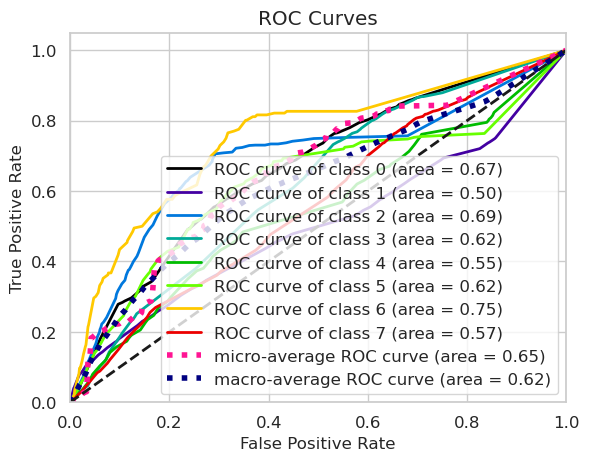

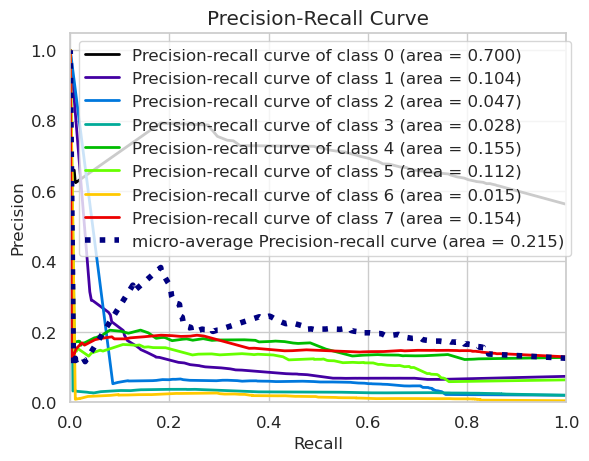

              precision    recall  f1-score   support

           0       0.75      0.32      0.44     25776
           1       0.15      0.13      0.14      3374
           2       0.06      0.30      0.10       909
           3       0.03      0.36      0.06       911
           4       0.18      0.15      0.16      5836
           5       0.12      0.20      0.15      2914
           6       0.02      0.28      0.03       196
           7       0.20      0.12      0.15      5915

    accuracy                           0.25     45831
   macro avg       0.19      0.23      0.15     45831
weighted avg       0.49      0.25      0.31     45831



ValueError: too many values to unpack (expected 4)

In [69]:
roc_auc_rus,fpr_rus,tpr_rus , _ = build_and_test(X_res, X_test, y_res, y_test)

In [70]:
from imblearn.under_sampling import NearMiss
under_sampler = NearMiss()
X_res, y_res = under_sampler.fit_resample(X_train, y_train)

In [58]:
df.Pred6

0         0
1         0
2         0
3         0
4         0
         ..
152765    2
152766    2
152767    2
152768    2
152769    2
Name: Pred6, Length: 152770, dtype: int64

In [71]:
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 581, 1: 581, 2: 581, 3: 581, 4: 581, 5: 581, 6: 581, 7: 581})
Testing target statistics: Counter({0: 25776, 7: 5915, 4: 5836, 1: 3374, 5: 2914, 3: 911, 2: 909, 6: 196})


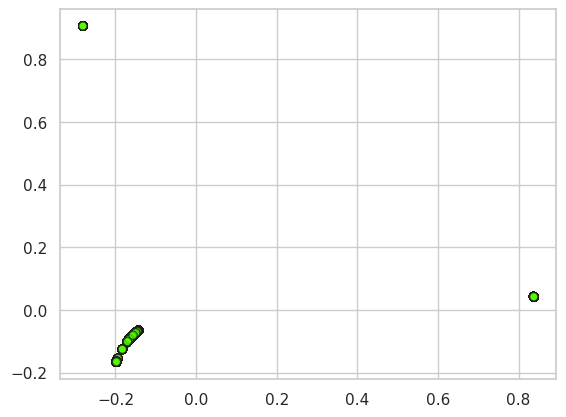

Precision score 0.1559281740954172
Recall score 0.14385220738592341
F1-score score 0.06450092358642433


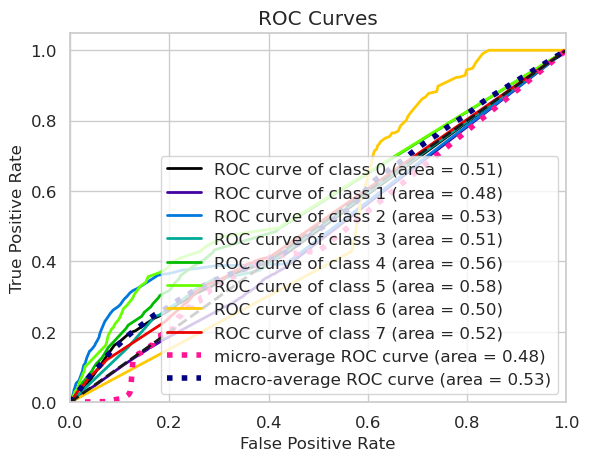

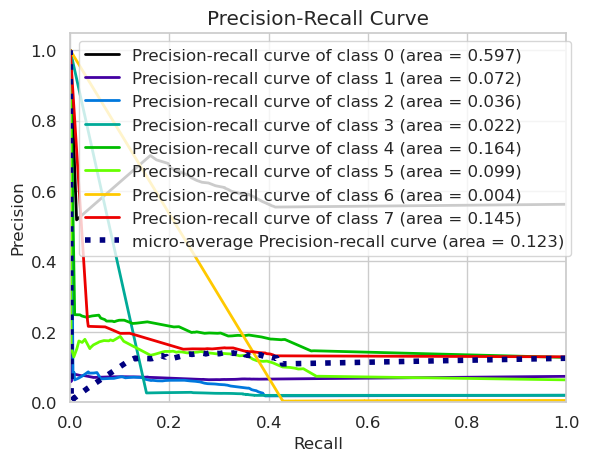

              precision    recall  f1-score   support

           0       0.57      0.05      0.09     25776
           1       0.07      0.01      0.02      3374
           2       0.05      0.22      0.09       909
           3       0.03      0.22      0.05       911
           4       0.23      0.04      0.07      5836
           5       0.10      0.08      0.09      2914
           6       0.00      0.46      0.01       196
           7       0.19      0.07      0.10      5915

    accuracy                           0.06     45831
   macro avg       0.16      0.14      0.06     45831
weighted avg       0.39      0.06      0.08     45831



ValueError: too many values to unpack (expected 4)

In [72]:
roc_auc_nm,fpr_nm,tpr_nm, _ = build_and_test(X_res, X_test, y_res, y_test)

In [73]:
n= Counter(y_train)
ratio = int(n[0]/n[1])
ratio, n

(7,
 Counter({4: 13763,
          0: 60131,
          7: 13540,
          1: 7895,
          5: 6695,
          2: 2097,
          3: 2237,
          6: 581}))

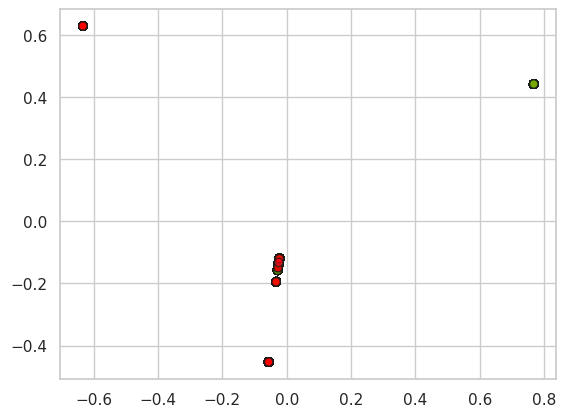

/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score 0.19029055706860284
Recall score 0.15935130848008613
F1-score score 0.1141618497109328


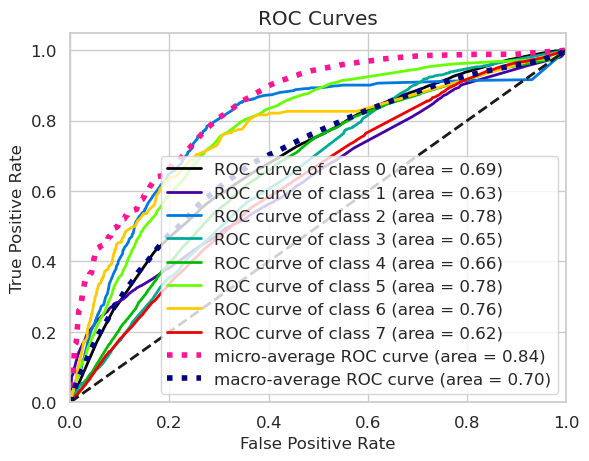

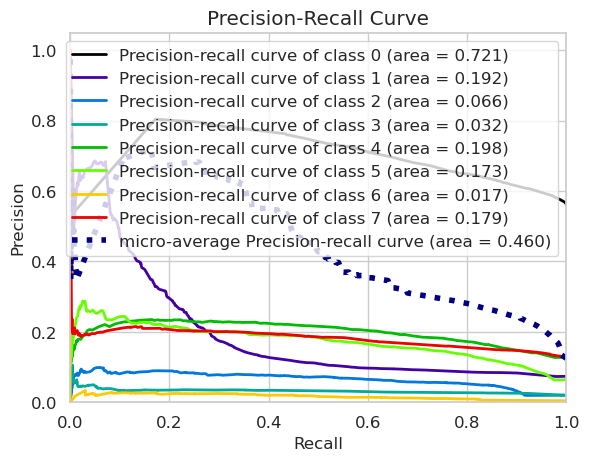

              precision    recall  f1-score   support

           0       0.65      0.77      0.71     25776
           1       0.11      0.49      0.18      3374
           2       0.08      0.00      0.00       909
           3       0.00      0.00      0.00       911
           4       0.16      0.00      0.01      5836
           5       0.21      0.01      0.01      2914
           6       0.00      0.00      0.00       196
           7       0.31      0.00      0.00      5915

    accuracy                           0.47     45831
   macro avg       0.19      0.16      0.11     45831
weighted avg       0.45      0.47      0.41     45831



/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: too many values to unpack (expected 4)

In [74]:
roc_auc_cw,fpr_cw,tpr_cw, _ = build_and_test(X_train, X_test, y_train, y_test, class_weight={0:1, 1:ratio})

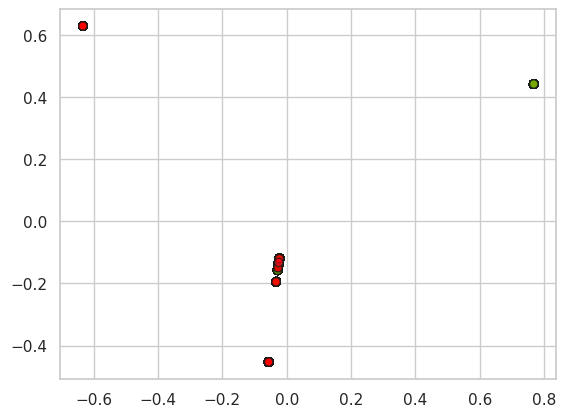

/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score 0.21716488142891488
Recall score 0.14694108781519535
F1-score score 0.13095012923008603


IndexError: index 2 is out of bounds for axis 1 with size 2

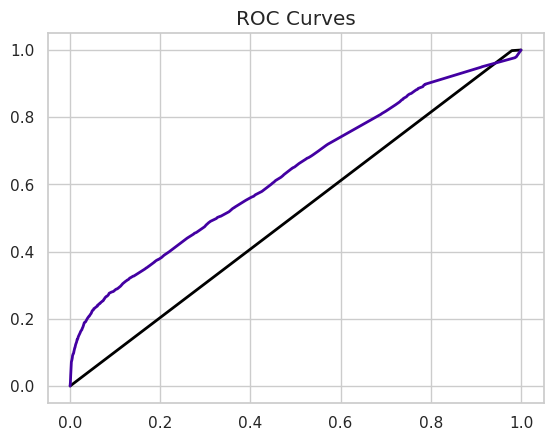

In [94]:
#fpr0 = 0
#thresholds = [0.05, 0.06, 0.07, 0.08, 0.09, 1, 0.03, 0.02, 0.01]
roc_auc_thr,fpr_thr,tpr_thr, threshold = build_and_test(X_train, X_test, y_train, y_test, threshold=True)
print(f"Best Treshold: {threshold}")

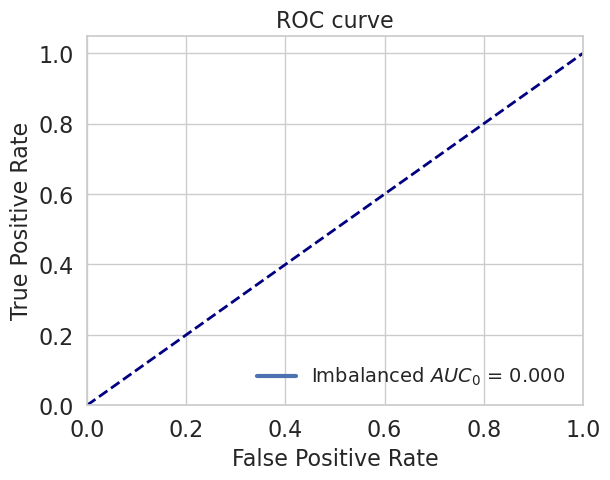

In [98]:
plt.plot(fpr_imb, tpr_imb, lw=3, label='Imbalanced $AUC_0$ = %.3f' % (roc_auc_imb))
# plt.plot(fpr_ros, tpr_ros, lw=3, label='ROS $AUC_0$ = %.3f' % (roc_auc_ros))
# plt.plot(fpr_smote, tpr_smote, lw=3, label='SMOTE $AUC_0$ = %.3f' % (roc_auc_smote))
# plt.plot(fpr_rus, tpr_rus, lw=3, label='RUS $AUC_0$ = %.3f' % (roc_auc_rus))
# plt.plot(fpr_nm, tpr_nm, lw=3, label='NM $AUC_0$ = %.3f' % (roc_auc_nm))
# plt.plot(fpr_cw, tpr_cw, lw=3, label='CW $AUC_0$ = %.3f' % (roc_auc_cw))
# plt.plot(fpr_thr, tpr_thr, lw=3, label='NM $AUC_0$ = %.3f' % (roc_auc_thr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

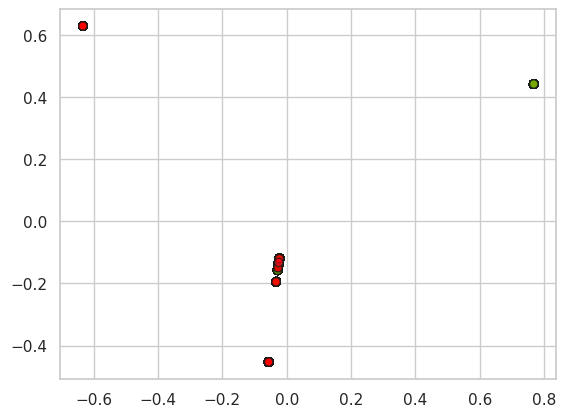

/opt/conda/envs/rapids/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score 0.21716488142891488
Recall score 0.14694108781519535
F1-score score 0.13095012923008603


IndexError: index 2 is out of bounds for axis 1 with size 2

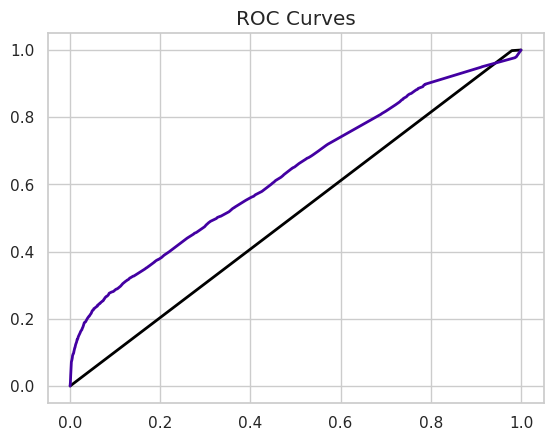

In [99]:
roc_auc_thr,fpr_thr,tpr_thr, threshold = build_and_test(X_train, X_test, y_train, y_test, threshold=True)
print(f"Best Treshold: {threshold}")

In [59]:
y_test.values

array([7, 0, 1, ..., 0, 4, 5])

In [60]:
df_y_test = cudf.DataFrame()
df_y_test = y_test.to_frame()
df_wynik_koncowy = cudf.DataFrame()
df_wynik_koncowy = wynik_koncowy

In [61]:
type(y_test)

pandas.core.series.Series

In [62]:
df_wynik_koncowy

fit_time  score_time  test_accuracy   test_r2  test_balanced_accuracy  \
0    18.881550    1.325626       0.757609  0.404278                0.458545   
1    18.536669    1.260184       0.758949  0.401836                0.471045   
2    18.703256    1.265684       0.759481  0.412370                0.469223   
3    18.235997    1.330476       0.757722  0.392506                0.472216   
4    19.037886    1.284369       0.764718  0.409011                0.469160   
5     1.786126    0.186968       0.670226  0.144259                0.427668   
6     1.789657    0.170095       0.674958  0.168234                0.443489   
7     1.748574    0.187375       0.667267  0.121547                0.433704   
8     1.761091    0.168536       0.671890  0.165283                0.440016   
9     1.691263    0.170601       0.672258  0.146524                0.431249   
10    7.549770    0.575902       0.236786 -0.027420                0.312664   
11    7.471551    0.628447       0.242278  0.016465                0.308802   
12    7.622929    0.589826       0.224809 -0.078604                0.352894   
13    8.122477    0.697523       0.170356 -0.119458                0.283816   
14    7.921478    0.602204       0.589085  0.021003                0.351265   
15  208.845243    0.626582       0.714081  0.153283                0.451142   
16  210.622947    0.612606       0.716811  0.149844                0.451668   
17  210.996071    0.613830       0.713415  0.150724                0.451494   
18  211.019873    0.618435       0.714806  0.140054                0.460985   
19  215.110602    0.618885       0.720124  0.156891                0.452143   
20    0.061648    0.334205       0.216208 -0.574064                0.397998   
21    0.060111    0.371493       0.223786 -0.552297                0.398128   
22    0.072377    0.377972       0.218099 -0.527450                0.397007   
23    0.062731    0.329137       0.198053 -0.502308                0.398324   
24    0.076504    0.356407       0.215685 -0.570736                0.390640   
25    0.029786    0.335342       0.785182  0.478227                0.541453   
26    0.023115    0.307050       0.788856  0.472782                0.557751   
27    0.024150    0.263926       0.789428  0.475345                0.559191   
28    0.026749    0.284471       0.786606  0.468270                0.561036   
29    0.025077    0.231317       0.793642  0.487942                0.551473   

    test_f1  test_roc_auc  test_roc_auc_ovo  test_roc_auc_ovr_weighted  \
0       NaN           NaN          0.922424                   0.942875   
1       NaN           NaN          0.922121                   0.944080   
2       NaN           NaN          0.922584                   0.944845   
3       NaN           NaN          0.919283                   0.942180   
4       NaN           NaN          0.920800                   0.945784   
5       NaN           NaN          0.681174                   0.769479   
6       NaN           NaN          0.692512                   0.775066   
7       NaN           NaN          0.687132                   0.768574   
8       NaN           NaN          0.689549                   0.772553   
9       NaN           NaN          0.685236                   0.772024   
10      NaN           NaN          0.708912                   0.602912   
11      NaN           NaN          0.784680                   0.707166   
12      NaN           NaN          0.789757                   0.706261   
13      NaN           NaN          0.759033                   0.679869   
14      NaN           NaN          0.789387                   0.699476   
15      NaN           NaN          0.912103                   0.897220   
16      NaN           NaN          0.912656                   0.901007   
17      NaN           NaN          0.913844                   0.899270   
18      NaN           NaN          0.911521                   0.897802   
19      NaN           NaN          0.914061                   0.900421   
20

In [29]:
cv_wynik

{'fit_time': array([9.30730081, 0.45884871, 0.43557024, 0.46235728, 0.42743206]),
 'score_time': array([0.73249078, 0.32904696, 0.32717657, 0.32146621, 0.30429387]),
 'test_accuracy': array([0.26030928, 0.26788856, 0.23258193, 0.23491388, 0.25426502]),
 'test_r2': array([-0.51457317, -0.51063619, -0.50505065, -0.46997062, -0.54238199])}

In [30]:
X_test

Pora    Zachm3    Zachm6   ZachmN3   ZachmN6  Wiatr_N  Wiatr_E  \
14717      0  2.666666  4.000000  2.333333  3.833333    0.000   4.9240   
8044       0  0.000000  0.000000  0.000000  0.000000    0.000   1.8794   
116558     5  7.000000  7.000000  6.333333  4.333333    1.500   2.5981   
61485      2  8.000000  8.000000  7.000000  7.000000    0.000   5.9088   
45556      4  2.666666  2.333333  2.666666  2.333333    0.866   0.5000   
...      ...       ...       ...       ...       ...      ...      ...   
43985      5  8.000000  8.000000  8.000000  8.000000    0.000   0.0000   
37080      0  0.000000  0.833333  0.000000  0.833333    0.000   0.0000   
134752     5  1.666666  0.833333  0.000000  0.000000    0.000   0.6428   
91940      0  0.000000  0.000000  0.000000  0.000000    0.000   0.0000   
63301      0  8.000000  8.000000  5.333333  5.666666    0.000   1.0000   

        Wiatr_S  Wiatr_W  DeltaTemp3  ...  Snieg_N  Snieg_S  OpadM_W  OpadM_E  \
14717    0.8682   0.0000        -1.6  ...        1        0        0        0   
8044     0.6840   0.0000        -1.1  ...        0        0        0        0   
116558   0.0000   0.0000        -1.6  ...        0        0        0        0   
61485    1.0419   0.0000         1.5  ...        0        0        0        0   
45556    0.0000   0.0000        -4.1  ...        0        0        0        0   
...         ...      ...         ...  ...      ...      ...      ...      ...   
43985    0.9397   0.3420        -0.4  ...        0        1        0        0   
37080    0.6946   3.9392        -0.3  ...        0        0        0        0   
134752   0.7660   0.0000        -3.6  ...        0        0        0        0   
91940    0.0000   0.0000        -2.8  ...        0        0        0        0   
63301    1.7321   0.0000         0.0  ...        6       12        0        0   

        OpadM_N  OpadM_S  Przelotny_W  Przelotny_E  Przelotny_N  Przelotny_S  
14717         0        0            0            0            0            0  
8044          0        0            0            0            0            0  
116558        0        0            5            1            0            4  
61485         0        0            0            3            0            2  
45556         0        0            0            0            0            0  
...         ...      ...          ...          ...          ...          ...  
43985         0        0            0            0            0            0  
37080         0        0            0            0            0            1  
134752        0        0            0            0            0            0  
91940         0        0            0            0            0            0  
63301         0        0            0            0            0            0  

[30554 rows x 54 columns]

In [16]:
df_y_test

Pred6
14717       0
8044        0
116558      3
61485       4
45556       0
...       ...
43985       1
37080       0
134752      0
91940       0
63301       5

[30554 rows x 1 columns]

In [19]:
type(df_y_test)

cudf.core.dataframe.DataFrame

In [20]:
type(df_wynik_koncowy)

pandas.core.frame.DataFrame

In [21]:
wynik_df = cudf.DataFrame()
wynik_df = cudf.concat([df_wynik_koncowy, y_test])
wynik_df

TypeError: cannot concatenate object of type <class 'pandas.core.frame.DataFrame'>

Wyniki walidacji krzyżowej:
      fit_time  score_time  test_accuracy   test_r2   model
0   21.441311    0.501806       0.754173  0.392031     rfc
1   22.439229    0.523650       0.753754  0.392118     rfc
2   22.323431    0.515533       0.755799  0.396315     rfc
3   45.206119    1.671667       0.754858  0.386275     rfc
4   71.693028    1.673652       0.759277  0.388283     rfc
0    6.414592    0.023107       0.666667  0.133655  Dtreec
1    6.564776    0.024393       0.665098  0.132488  Dtreec
2    5.694706    0.023880       0.664076  0.146635  Dtreec
3    5.315456    0.025548       0.667267  0.144324  Dtreec
4    3.506710    0.008797       0.668330  0.138389  Dtreec
0   12.018652    0.224629       0.227704  0.003209    adac
1    8.887191    0.200010       0.494375 -0.149663    adac
2    8.634606    0.223306       0.311950 -0.035284    adac
3    8.575912    0.183541       0.243914 -0.007494    adac
4    8.332105    0.191337       0.531195 -0.245123    adac
0  246.414053    0.231396  

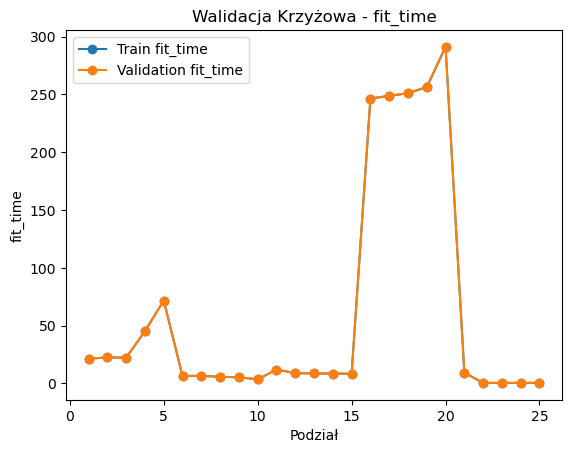

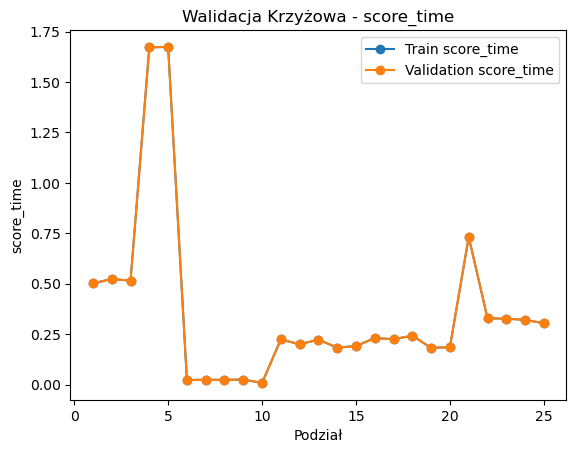

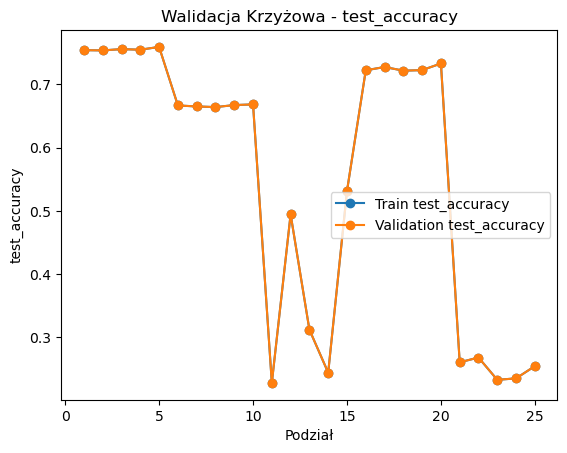

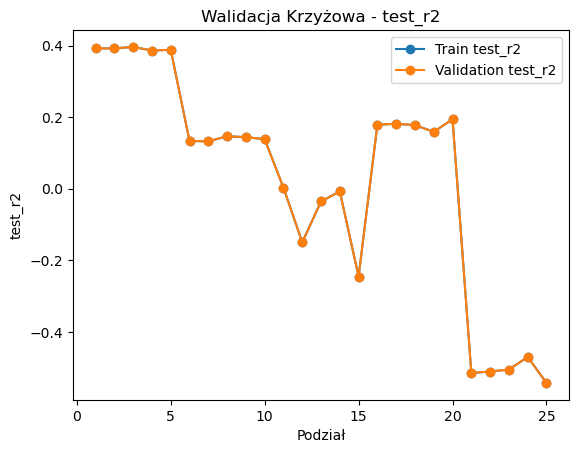

In [22]:
import matplotlib.pyplot as plt
print("Wyniki walidacji krzyżowej:\n", wynik_koncowy)

# Wykres dla każdej z metryk
for metric in cv_wynik:
    train_scores = wynik_koncowy[f'{metric}']
    test_scores = wynik_koncowy[f'{metric}']
    nazwa-modelu = range(1, len(train_scores) + 1)

    plt.figure()
    plt.plot(n_splits, train_scores, 'o-', label=f'Train {metric}')
    plt.plot(n_splits, test_scores, 'o-', label=f'Validation {metric}')
    plt.title(f'Walidacja Krzyżowa - {metric}')
    plt.xlabel('Podział')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

In [23]:
print('df.Pred6',len(df.Pred6))
print('y_test',len(y_test))

df.Pred6 152770
y_test 30554


In [24]:
y_test

14717     0
8044      0
116558    3
61485     4
45556     0
         ..
43985     1
37080     0
134752    0
91940     0
63301     5
Name: Pred6, Length: 30554, dtype: int64

In [25]:
len(df)

152770

In [27]:
wynik_koncowy.values[0][1]

0.5251169204711914

In [28]:
len(wynik_koncowy)

20

In [60]:
import matplotlib.pyplot as plt
import numpy as np

data = list([])

# loading data
for i in range(len(wynik_koncowy)):
    for y in range(3):
        data = data.append(wynik_koncowy[i][y])

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a boxplot
ax.boxplot(data)

# Add title and labels
ax.set_title('Boxplot Example')
ax.set_ylabel('Values')

# Show the plot
plt.show()


KeyError: 0

In [30]:
model = cuml.LinearRegression(fit_intercept=True, normalize=True)
model.fit(X_train, y_train).predict(X_test)

14717    -0.229137
8044     -0.094693
116558    3.915746
61485     2.824356
45556     0.322417
            ...   
43985     1.509785
37080     0.280610
134752    0.096869
91940     0.363788
63301     4.058424
Length: 30554, dtype: float64

In [31]:
model = cuml.Lasso(fit_intercept=False, normalize=True)
model.fit(X_train, y_train).predict(X_test)

14717     0.0
8044      0.0
116558    0.0
61485     0.0
45556     0.0
         ... 
43985     0.0
37080     0.0
134752    0.0
91940     0.0
63301     0.0
Length: 30554, dtype: float64

In [32]:
model = cuml.LogisticClassifier(fit_intercept=True)
model.fit(X_train, y_train).predict(X_test)

AttributeError: module cuml has no attribute LogisticClassifier

In [33]:
model.predict_proba(X_test)

AttributeError: predict_proba

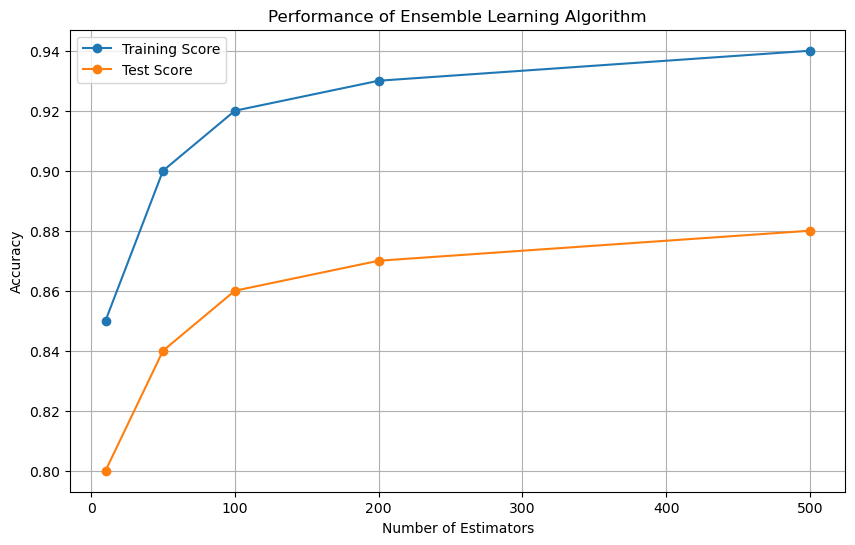

In [34]:
import matplotlib.pyplot as plt

# Przykładowe dane
n_estimators = [10, 50, 100, 200, 500]
train_scores = [0.85, 0.9, 0.92, 0.93, 0.94]
test_scores = [0.8, 0.84, 0.86, 0.87, 0.88]

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, train_scores, label='Training Score', marker='o')
plt.plot(n_estimators, test_scores, label='Test Score', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Performance of Ensemble Learning Algorithm')
plt.legend()
plt.grid(True)
plt.show()


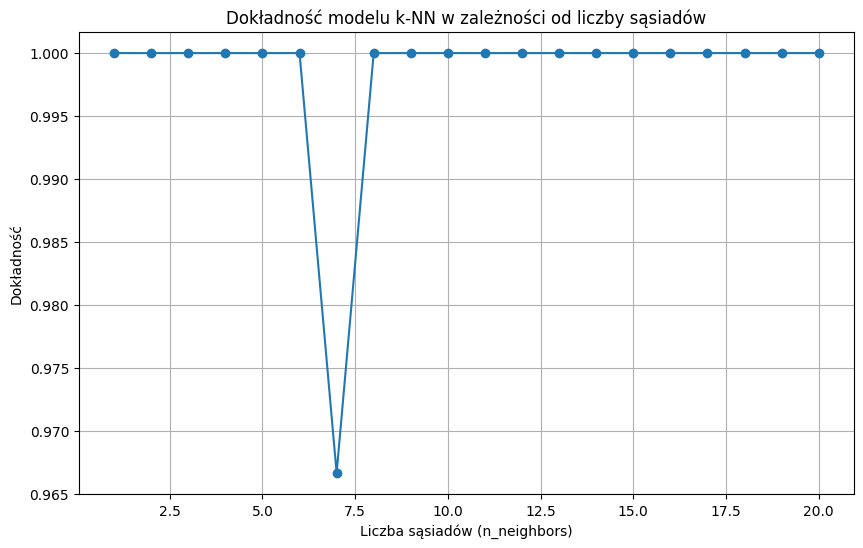

In [45]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Załaduj przykładowy zbiór danych (Iris dataset)
iris = load_iris()
X, y = iris.data, iris.target

# Podziel dane na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Przygotuj listy do przechowywania wyników
neighbors = range(1, 21)  # Testujemy od 1 do 20 sąsiadów
accuracies = []

# Testujemy różne wartości n_neighbors
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Wyświetl wykres dokładności w zależności od liczby sąsiadów
plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracies, marker='o', linestyle='-')
plt.title('Dokładność modelu k-NN w zależności od liczby sąsiadów')
plt.xlabel('Liczba sąsiadów (n_neighbors)')
plt.ylabel('Dokładność')
plt.grid(True)
plt.show()


In [53]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_blobs
# from sklearn.neighbors import NearestNeighbors

# # Tworzenie przykładowych danych
# X, y = df[['Pora', 'Zachm3', \
#        'Zachm6', 'ZachmN3', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
#        'Wiatr_W', 'DeltaTemp3', 'TemperaturaPowietrza', 'DeltaTemp6', \
#        'DeltaTempRosy3', 'DeltaTempRosy6', 'TemperaturaPunktuRosy', \
#        'Cisn3', 'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', 'Opady12', \
#        'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
#        'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
#        'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
#        'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
#        'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
#        'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
#        'Przelotny_S']], df.Pred6

# # Tworzenie modelu KNN
# k = 3
# knn = NearestNeighbors(n_neighbors=k)
# knn.fit(X)

# # Wykres
# plt.figure(figsize=(8, 6))

# # Wyznaczanie klastrów
# distances, indices = knn.kneighbors(X)
# for i in range(X.shape[0]):
#     for j in indices[i]:
#         plt.plot([X[i, 0], X[j, 0]], [X[i, 1], X[j, 1]], 'k--', alpha=0.3)

# # Wyświetlenie punktów danych
# plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
# plt.title(f"KNN Clusters (k={k})")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.show()


In [5]:
!python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

2023-11-26 10:08:18.022213: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 10:08:18.022261: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 10:08:18.022283: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 10:08:18.026995: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-26 10:08:18.884903: W tensorflow/compiler/

In [3]:
!nvidia-smi

Sat Jan  6 15:28:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.36                 Driver Version: 546.33       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090        On  | 00000000:01:00.0  On |                  Off |
|  0%   53C    P5              29W / 450W |   3898MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# import matplotlib.pyplot as plt
# # Tworzenie wykresu dla predykcji kolejnych danych
# X_new = df[['id', 'Widz3']]

# # Przewidywanie klas na nowych danych
# y_new = knn.predict(X_new)

# print("Predykcje na nowych danych:")
# for i in range(len(X_new)):
#     print(f"Dane: {X_new[i]}, Predykcja klasy: {y_new[i]}")

# # Wykres klas
# plt.figure()
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k')
# plt.xlabel('nr pomiaru')
# plt.ylabel('Predykcja widzialności na następne trzy godziny')

# plt.show()

In [29]:
# import matplotlib.pyplot as plt

# # Indeksy wybranych cech (pierwsza i druga kolumna)
# feature1 = [0,  1,  3]
# feature2 = [0,  1,  3]

# # Indeksy klas (unikalne wartości w y)
# classes = list(set(y))

# # Kolor każdej klasy
# colors = ['b', 'g', 'r']

# # Tytuł wykresu
# plt.title("K-NN Classification")

# # Rysowanie punktów danych
# for c in classes:
#     plt.scatter(X_test[y_test == c, feature1], X_test[y_test == c, feature2], c=colors[c], label="Class " + str(c))

# # Rysowanie punktów predykcji
# plt.scatter(X_test[:, feature1], X_test[:, feature2], c='k', marker='x', label="Predictions")

# plt.xlabel('nr pomiaru')
# plt.ylabel('Predictions')

# plt.legend(loc='best')

# plt.show()


In [47]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import StackingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from cuml.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn import model_selection
# from sklearn.naive_bayes import GaussianNB
# # from cuml import KMeans
# from cuml.cluster import DBSCAN
# from cuml.decomposition import PCA
# from cuml.manifold import TSNE
# from cuml import DBSCAN as cumlDBSCAN
# from cuml.dask.ensemble import RandomForestClassifier as cuMLDaskRFClassifier
# from dask_ml.cluster import KMeans as skKMeans



# def EksperymentMLRegresja(X,y):
#     dfs=[]
#     wyniki=[]
#     models = [ 
#     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
#     ('Dtree', DecisionTreeClassifier()),
#     #  ('lr', LogisticRegression()),
#     #  ('svc', SVC(probability=True)),  # Używamy implementacji SVC z sklearn, ponieważ cuml nie oferuje wsparcia dla SVC
#     ('gnb', GaussianNB()),
#     # ('KMeans', KMeans),
#     ('DBSCAN', DBSCAN),
#     # ('PCA', PCA),
#     ('KNC', KNeighborsClassifier)
#     ],
#     #wyniki=[]
#     scoring=['accuracy','r2']
#     for model in models:
#         podzial=model_selection.KFold(n_splits=10,shuffle=True,random_state=125)
#         model = StackingClassifier(estimators=models, final_estimator=LogisticRegression(), cv=5)
#         model.fit(X,y)
#         cv_wynik=model_selection.cross_validate(model,X,y,cv=podzial,scoring=scoring)
#         wyniki.append(cv_wynik)
#         df=pd.DataFrame(cv_wynik)
#         df['model']= model
#         dfs.append(df)
#     final=pd.concat(dfs,ignore_index=True)
#     return final

# X, y = df[['Pora', 'Zachm3', \
# 'Zachm6', 'ZachmN3', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
# 'Wiatr_W', 'DeltaTemp3', 'TemperaturaPowietrza', 'DeltaTemp6', \
# 'DeltaTempRosy3', 'DeltaTempRosy6', 'TemperaturaPunktuRosy', \
# 'Cisn3', 'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', 'Opady12', \
# 'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
# 'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
# 'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
# 'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
# 'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
# 'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
# 'Przelotny_S']], df.Pred6

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# f_X_train = X_train.to_numpy()
# f_y_train = y_train.to_numpy()

# final = EksperymentMLRegresja(f_X_train, f_y_train)
# print(final)

In [45]:
# from dask_cuda import LocalCUDACluster
# from dask.distributed import Client
# import dask_cudf
# from cuml.linear_model import Lasso
# from cuml.common.device_selection import using_device_type, set_global_device_type
# from cuml.model_selection import train_test_split
# from sklearn.ensemble import StackingClassifier
# from sklearn.tree import DecisionTreeRegressor
# from cuml.svm import SVC
# from sklearn import model_selection
# from cuml.naive_bayes import GaussianNB
# from cuml import KMeans
# from cuml.cluster import DBSCAN
# from cuml.decomposition import PCA
# from cuml.manifold import TSNE
# from cuml import DBSCAN as cumlDBSCAN
# from cuml import KNeighborsClassifier


# cluster = LocalCUDACluster()
# client = Client(cluster)


# def EksperymentMLRegresja(X,y):
#     dfs=[]
#     wyniki=[]
#     models = [
#     ('RFC', cuMLDaskRFClassifier()), 
#     # ('RFC', RandomForestClassifier()),
#     # ('Dtree', DecisionTreeClassifier()),
#     ('skk', skKMeans()),
#     ('NNC', KNeighborsClassifier()),
#     ],
#     #wyniki=[]
#     scoring=['accuracy','r2']
#     for model in models:
#         podzial=model_selection.KFold(n_splits=10,shuffle=True,random_state=125)
#         model = StackingClassifier(estimators=model, final_estimator=cuMLDaskRFClassifier(), cv=5)
#         model.fit(X,y)
#         cv_wynik=model_selection.cross_validate(model,X,y,cv=podzial,scoring=scoring)
#         wyniki.append(cv_wynik)
#         df=pd.DataFrame(cv_wynik)
#         df['model']= model
#         dfs.append(df)
#     final=pd.concat(dfs,ignore_index=True)
#     return final

# X, y = df[['Pora', 'Zachm3', \
# 'Zachm6', 'ZachmN3', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
# 'Wiatr_W', 'DeltaTemp3', 'TemperaturaPowietrza', 'DeltaTemp6', \
# 'DeltaTempRosy3', 'DeltaTempRosy6', 'TemperaturaPunktuRosy', \
# 'Cisn3', 'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', 'Opady12', \
# 'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
# 'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
# 'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
# 'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
# 'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
# 'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
# 'Przelotny_S']], df.Pred6

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# f_X_train = X_train.to_numpy()
# f_y_train = y_train.to_numpy()

# final = EksperymentMLRegresja(f_X_train, f_y_train)
# print(final)

In [47]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB

# def train_stacking(X_train, y_train):
#     estimators = [
#         ('lr', LogisticRegression(max_iter=1000, random_state=42)),
#         ('svc', SVC(probability=True, random_state=42)),
#         ('gnb', GaussianNB())
#     ]
#     model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
#     progress = model.fit(X_train, y_train)
#     print(progress)
#     return model

# X, y = df[['Pora', 'Zachm3', \
#        'Zachm6', 'ZachmN3', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
#        'Wiatr_W', 'DeltaTemp3', 'TemperaturaPowietrza', 'DeltaTemp6', \
#        'DeltaTempRosy3', 'DeltaTempRosy6', 'TemperaturaPunktuRosy', \
#        'Cisn3', 'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', 'Opady12', \
#        'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
#        'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
#        'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
#        'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
#        'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
#        'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
#        'Przelotny_S']], df.Pred6

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train_stacking(X_train, y_train)

In [46]:
# import cuml
# from cuml.linear_model import LinearRegression, LogisticRegression
# from cuml.ensemble import RandomForestRegressor
# # from cuml.tree import DecisionTreeRegressor
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from cuml.datasets import make_classification
# from cuml.metrics import accuracy_score
# from sklearn.ensemble import StackingRegressor

# # Generowanie danych
# X, y = df[['Pora', 'Zachm3', \
#        'Zachm6', 'ZachmN3', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
#        'Wiatr_W', 'DeltaTemp3', 'TemperaturaPowietrza', 'DeltaTemp6', \
#        'DeltaTempRosy3', 'DeltaTempRosy6', 'TemperaturaPunktuRosy', \
#        'Cisn3', 'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', 'Opady12', \
#        'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
#        'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
#        'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
#        'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
#        'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
#        'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
#        'Przelotny_S']], df.Pred6

# X_train, X_test = X[:800], X[800:]
# y_train, y_test = y[:800], y[800:]

# # Definicja modeli
# models = [
#     ('LinReg', LinearRegression()), 
#     ('RF', RandomForestRegressor(n_estimators=100, max_depth=5)),
#     # ('Dtree', DecisionTreeRegressor(max_depth=5)),
#     ('lr', LogisticRegression(max_iter=1000))
#     # Pozostałe modele nie są dostępne w cuML
# ]

# # Uczenie modelu składającego się
# # Uwaga: musisz użyć StackingRegressor z sklearn, ponieważ cuml nie oferuje go
# model = StackingRegressor(estimators=models, final_estimator=LinearRegression())
# model.fit(X_train, y_train)

# # Predykcje
# y_pred = model.predict(X_test)


In [52]:
# import xgboost as xgb
# from xgboost import DMatrix

# def trenuj_xgboost(X_train, y_train, X_test, y_test, parametry=None):
#     """
#     Trenuje model XGBoost na danych treningowych i ocenia na danych testowych.

#     Args:
#     - X_train (array-like): cechy danych treningowych
#     - y_train (array-like): etykiety danych treningowych
#     - X_test (array-like): cechy danych testowych
#     - y_test (array-like): etykiety danych testowych
#     - parametry (dict, optional): parametry dla modelu XGBoost

#     Returns:
#     - model: wytrenowany model XGBoost
#     - ocena: ocena modelu na danych testowych
#     """

#     if parametry is None:
#         parametry = {
#             'objective': 'binary:logistic',
#             'eval_metric': 'logloss',
#             'eta': 0.1,
#             'max_depth': 5
#         }

#     dtrain = DMatrix(X_train, label=y_train)
#     dtest = DMatrix(X_test, label=y_test)

#     num_rounds = 100
#     evals = [(dtrain, 'train'), (dtest, 'eval')]
    
#     model = xgb.train(parametry, dtrain, num_rounds, evals, early_stopping_rounds=10, verbose_eval=True)
    
#     ocena = model.eval(dtest)

#     return model, ocena

# # Przykład użycia (z przykładowymi danymi):
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split

# X, y = df[['Pora', 'Zachm3', \
#        'Zachm6', 'ZachmN3', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
#        'Wiatr_W', 'DeltaTemp3', 'TemperaturaPowietrza', 'DeltaTemp6', \
#        'DeltaTempRosy3', 'DeltaTempRosy6', 'TemperaturaPunktuRosy', \
#        'Cisn3', 'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', 'Opady12', \
#        'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
#        'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
#        'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
#        'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
#        'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
#        'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
#        'Przelotny_S']], df.Pred6

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model, ocena = trenuj_xgboost(X_train, y_train, X_test, y_test)


In [45]:
# from sklearn.model_selection import train_test_split
# from cuml.linear_model import LinearRegression, LogisticRegression # final estimator
# from cuml.linear_model import LinearRegression as cuLinearRegression
# from sklearn.ensemble import BaggingRegressor
# from sklearn.ensemble import StackingClassifier
# from cuml.ensemble import RandomForestClassifier as cuMLRandomForestClassifier
# from cuml import KMeans
# from cuml.cluster import DBSCAN
# from cuml.decomposition import PCA
# from cuml.manifold import TSNE
# from cuml.svm import SVC
# from cuml import DBSCAN as cumlDBSCAN
# from sklearn.decomposition import PCA
# from sklearn.neighbors import KNeighborsClassifier
# from cuml.ensemble import RandomForestRegressor
# from cuml.linear_model import LogisticRegression
# from cuml.neighbors import KNeighborsClassifier
# from cuml.ensemble import RandomForestRegressor

# #from sklearn.svm import SVC  # cuml nie oferuje jeszcze wsparcia dla SVC
# from cuml.naive_bayes import GaussianNB

# def train_stacking(X_train, y_train):
#     estimators = [
#         ('lr', LogisticRegression(max_iter=1000)),
#         ('logr', cuLinearRegression()),
#         ('RF', cuMLRandomForestClassifier()),
#         # ('KMeans', KMeans),
#         # ('DBSCAN', DBSCAN),
#         # ('PCA', PCA),
#         # ('knc', KNeighborsClassifier),
#         ('BR', BaggingRegressor()),
#         ('svc', SVC(probability=True)),  # Używamy implementacji SVC z sklearn, ponieważ cuml nie oferuje wsparcia dla SVC
#         ('gnb', GaussianNB())
#     ]
#     base_model = cuLinearRegression(verbose=True)
#     bagging_model = BaggingRegressor(base_estimator=base_model, n_estimators=estimators)
#     model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
#     model.fit(X_train, y_train)
#     return model

# estimators = [
#     ('lr', LogisticRegression(max_iter=1000)),
#     ('RF', RandomForestRegressor()),
# #    ('BR', BaggingRegressor()),
# #        ('svc', SVC(probability=True)),  # Używamy implementacji SVC z sklearn, ponieważ cuml nie oferuje wsparcia dla SVC
#     ('gnb', GaussianNB())
# ]


# X, y = df[['Pora', 'Zachm3', \
#        'Zachm6', 'ZachmN3', 'ZachmN6', 'Wiatr_N', 'Wiatr_E', 'Wiatr_S', \
#        'Wiatr_W', 'DeltaTemp3', 'TemperaturaPowietrza', 'DeltaTemp6', \
#        'DeltaTempRosy3', 'DeltaTempRosy6', 'TemperaturaPunktuRosy', \
#        'Cisn3', 'Cisn6', 'CisnienieNaPoziomieStacji', 'Opady6', 'Opady12', \
#        'Mgla6', 'Mzawka6', 'Deszcz6', 'Snieg6', 'Przelotny6', 'Burza6', \
#        'Mgla_W', 'Mgla_E', 'Mgla_N', 'Mgla_S', 'Mzawka_W', 'Mzawka_E', \
#        'Mzawka_N', 'Mzawka_S', 'Burza_W', 'Burza_E', 'Burza_N', 'Burza_S', \
#        'Deszcz_W', 'Deszcz_E', 'Deszcz_N', 'Deszcz_S', 'Snieg_W', \
#        'Snieg_E', 'Snieg_N', 'Snieg_S', 'OpadM_W', 'OpadM_E', 'OpadM_N', \
#        'OpadM_S', 'Przelotny_W', 'Przelotny_E', 'Przelotny_N', \
#        'Przelotny_S']], df.Pred6

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Zdefiniuj model stacking z regresją logistyczną jako ostatecznym estymatorem
# # stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# X_train = X_train.astype('float32')
# y_train = y_train.astype('float32')
# stacking_classifier = train_stacking(X_train, y_train)

# reshaped_X_train_array = X_train.to_numpy().reshape(-1, 1)
# reshaped_y_train_array = y_train.to_numpy().reshape(-1, 1)

# f_X_train = X_train.to_numpy()
# f_y_train = y_train.to_numpy()
# # Trenuj model
# # stacking_classifier.fit(f_X_train, f_y_train)
# hiatory = stacking_classifier.fit(f_X_train, f_y_train)

# # Prognozuj na zestawie testowym
# f_X_test = X_test.to_numpy()

# y_pred = stacking_classifier.predict(f_X_test)
# # y_pred = stacking_classifier.predict(X_test)

# for i in range(len(y_pred)):
#     print('Przewidywane wartośći:', y_pred[i])

In [46]:
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import VotingClassifier
# from sklearn.metrics import accuracy_score

# # X_test = X_test.to_numpy()
# predictions = stacking_classifier.predict(X_test)
# accuracy = accuracy_score(y_test, predictions)

# print(f"Ensemble model accuracy: {accuracy:.2f}")

In [17]:
%run Start_skrypt_Jan_Zubik.py

In [109]:
print(podzial)

KFold(n_splits=5, random_state=125, shuffle=True)


In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
rfc = RandomForestClassifier()
gnbc = GaussianNB()
knc = KNeighborsClassifier(n_neighbors=2)
wybrany_model = [('rfc', rfc)]#, ('gnbc', gnbc), ('knc', knc)]
wybrane_miary = ['balanced_accuracy']#,'roc_auc_ovo','f1_macro']

In [112]:
lista_modeli = [
    ('dtreec', dtreec), # - sprawdzone działa
    ('rfc', rfc), # - sprawdzone działa
    ('adac', adac),# - sprawdzone działa
    ('gnbc', gnbc),# - sprawdzone działa
   # ('gbc', gbc), #- sprawdzone działa 26 min
    ('knc', knc), #- sprawdzone działa 1 min
    ('lrc', lrc), #- działa 1min (woring dotyczy nie podania mokasymalnej ilości iteracji (która standardowo wynosi 100))
   # ('svc', svc), #- nie przetestowane bardzo długo to działa (nie obsuguje prawdopodobieństw dodanie probability=True poprawio pomóc)
    #('lsvc', lsvc), #- nie przetestowane bardzo długo to działa (nie obsuguje prawdopodobieństw dodanie probability=True poprawio pomóc)
]

In [104]:
from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler, NearMiss, EditedNearestNeighbours, RepeatedEditedNearestNeighbours, TomekLinks

random = RandomUnderSampler()
cc = ClusterCentroids()
nm = NearMiss()
enn = EditedNearestNeighbours()
ren = RepeatedEditedNearestNeighbours()
tl = TomekLinks()

Lista_funkcji_balansujacych = [
    ('random', random),
    ('cc', cc),
    ('nm', nm),
    ('enn', enn),
    ('ren', ren),
    ('tl', tl),
]

In [114]:
sampling_strategy = ['majority', 'not minority', 'not minority', 'all']
random_state = ['42','RandomState']
voting = ['hard', 'soft']
kind_sel = ['all', 'mode']
version = ['1','2','3']
n_neighbors = range(1,11)
n_neighbors_ver3 = range(1,11)
max_iter = range(25,500,25)
n_job = -1
konfiguracje =[]
for i in range(0,len(sampling_strategy)):
    for j in range(0,len(random_state)):
        for k in range(0,len(voting)):
            for l in range (0,len(kind_sel)):
                for m in range(0,len(version)):
                    for n in range(0,len(n_neighbors)):
                        for o in range(0,len(n_neighbors_ver3)):
                            for p in range(0,len(max_iter)):
                                 konfiguracje.append({
                                    'sampling_strategy': sampling_strategy[i] ,
                                    'random_state': random_state[j],
                                    'voting': voting[k],
                                    'kind_sel': kind_sel[l],
                                    'version': version[m],
                                    'n_neighbors': n_neighbors[n],
                                    'n_neighbors_ver3': n_neighbors_ver3[o],
                                    'max_iter': max_iter[p],
                                    'n_job' : -1
                                    })

In [117]:
print(len(konfiguracje)*5)

912000


In [35]:
def funkcja_badajaca_balansowanie_z_parametrami(X, y, lista_modeli, miary, podzial, parametry_konfiguracyjne_lista, lista_funkcji):
    wyniki = []
    for nazwa, funkcja in lista_funkcji:
        for i, konfiguracja_slownik in enumerate(parametry_konfiguracyjne_lista):
            for parametr, wartosc in  konfiguracja_slownik.items():
                if parametr in funkcja.get_params().keys():
                    funkcja_balansujaca = funkcja.set_params(**{parametr: wartosc})
                    X_resampled, y_resampled = funkcja_balansujaca.fit_resample(X, y)  
                    df = TM_rozne_dane(X_resampled, y_resampled, lista_modeli, miary, podzial, dane= f' {nazwa}_konfig_v{i}')
                    wyniki.append(df)
                    final = pd.concat(wyniki, ignore_index=True)
    return final

In [125]:
def funkcja_badajaca_balansowanie_z_parametrami_szacowanie_czasu(X, y, lista_modeli, miary, podzial, parametry_konfiguracyjne_lista, lista_funkcji):
    zliczanie =0 
    for nazwa, funkcja in lista_funkcji:
        for konfiguracja_slownik in parametry_konfiguracyjne_lista:
            for parametr, wartosc in  konfiguracja_slownik.items():
                if parametr in funkcja.get_params().keys():
                    zliczanie=zliczanie+5
    return zliczanie
funkcja_badajaca_balansowanie_z_parametrami_szacowanie_czasu(X4,y4,lista_modeli,wybrane_miary,podzial,konfiguracje,Lista_funkcji_balansujacych)

AttributeError: 'list' object has no attribute 'items'

In [126]:
15504000/9

1722666.6666666667

In [38]:
wyniki_balansowania_wszystkich =funkcja_badajaca_balansowanie_z_parametrami(X4, y4, wybrany_model, wybrane_miary, podzial, konfiguracje, Lista_funkcji_balansujacych)

/home/student-wwsi/anaconda3/envs/rapids-23.12/lib/python3.9/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (3147) found smaller than n_clusters (3148). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/student-wwsi/anaconda3/envs/rapids-23.12/lib/python3.9/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (3147) found smaller than n_clusters (3148). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/student-wwsi/anaconda3/envs/rapids-23.12/lib/python3.9/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (3147) found smaller than n_clusters (3148). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/student-wwsi/anaconda3/envs/rapids-23.12/lib/python3.9/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (3147) found smaller tha

/tmp/ipykernel_3856274/231772585.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y=metryka, data=df, ax=axs[row, col], palette="Set3")


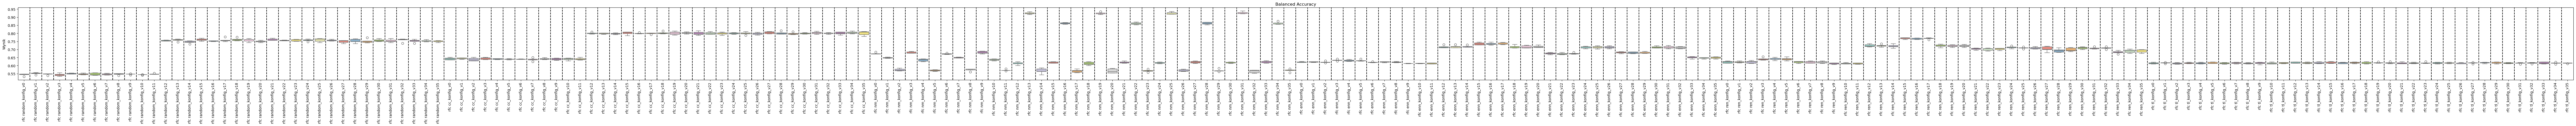

In [42]:
wykresy_boxplot_miary(wyniki_balansowania_wszystkich,wybrane_miary,rotation=90,labelsize=10)

In [ ]:
wyniki_balansowania_wszystkich[wyniki_balansowania_wszystkich['model'].str.contains('nm')].sort_values('test_balanced_accuracy', ascending=False)

In [111]:
wyniki_balansowania_wszystkich

model   fit_time  score_time  test_balanced_accuracy  \
0      rfc random_konfig_v0  15.845042    0.335100                0.531597   
1      rfc random_konfig_v0  16.448152    0.311685                0.546299   
2      rfc random_konfig_v0  16.380638    0.325809                0.547129   
3      rfc random_konfig_v0  13.676253    0.336970                0.544960   
4      rfc random_konfig_v0  15.944115    0.499361                0.547350   
5      rfc random_konfig_v1  15.774888    0.517187                0.541692   
6      rfc random_konfig_v1  16.860168    0.288912                0.550494   
7      rfc random_konfig_v1  15.841518    0.354564                0.557089   
8      rfc random_konfig_v1  16.732254    0.278579                0.553061   
9      rfc random_konfig_v1  14.861265    0.548943                0.553930   
10     rfc random_konfig_v2  14.140329    0.318544                0.538076   
11     rfc random_konfig_v2  15.905299    0.283311                0.547902   
12     rfc random_konfig_v2  16.483129    0.375027                0.547183   
13     rfc random_konfig_v2  15.598603    0.317919                0.549304   
14     rfc random_konfig_v2  16.790790    0.468894                0.549556   
15     rfc random_konfig_v3  17.142828    0.492575                0.538160   
16     rfc random_konfig_v3  14.920403    0.531449                0.546756   
17     rfc random_konfig_v3  17.305776    0.270394                0.543665   
18     rfc random_konfig_v3  15.121154    0.460286                0.533927   
19     rfc random_konfig_v3  16.371557    0.514864                0.555341   
20     rfc random_konfig_v4  16.480481    0.523918                0.554200   
21     rfc random_konfig_v4  17.620294    0.323458                0.547393   
22     rfc random_konfig_v4  15.737346    0.443151                0.552663   
23     rfc random_konfig_v4  16.743362    0.471299                0.549839   
24     rfc random_konfig_v4  16.776840    0.400424                0.547761   
25     rfc random_konfig_v5  14.622366    0.373327                0.542921   
26     rfc random_konfig_v5  13.030764    0.493628                0.547899   
27     rfc random_konfig_v5  14.786367    0.365533                0.554713   
28     rfc random_konfig_v5  15.554297    0.338093                0.544336   
29     rfc random_konfig_v5  13.435052    0.343722                0.549222   
30     rfc random_konfig_v6  14.945869    0.471184                0.541621   
31     rfc random_konfig_v6  15.432367    0.356757                0.543550   
32     rfc random_konfig_v6  14.456013    0.329956                0.540147   
33     rfc random_konfig_v6  12.938727    0.485393                0.553899   
34     rfc random_konfig_v6  12.414000    0.411538                0.555859   
35     rfc random_konfig_v7  13.412866    0.505358                0.543301   
36     rfc random_konfig_v7  15.112099    0.295588                0.546592   
37     rfc random_konfig_v7  16.049865    0.281837                0.551972   
38     rfc random_konfig_v7  13.698260    0.504083                0.549172   
39     rfc random_konfig_v7  15.119073    0.289054                0.541202   
40     rfc random_konfig_v8  14.708780    0.324897                0.538423   
41     rfc random_konfig_v8  13.653254    0.443113                0.548285   
42     rfc random_konfig_v8  15.750561    0.333830                0.551051   
43     rfc random_konfig_v8  15.729493    0.335430                0.546228   
44     rfc random_konfig_v8  15.335543    0.507911                0.551718   
45     rfc random_konfig_v9  17.158436    0.274964                0.541293   
46     rfc random_konfig_v9  15.694664    0.346211                0.549582   
47     rfc random_konfig_v9  16.012985    0.499445                0.547618   
48     rfc random_konfig_v9  16.348089    0.312525                0.547105   
49     rfc random_konfig_v9  14.993487    0.467222                0.547023   
50    rfc random_konfig_v10  15.925488    0.

In [107]:
wyniki_balansowania_wszystkich['konfig_v'] = wyniki_balansowania_wszystkich['model'].str.extract('v(\d+)').astype(int)
df_polaczone = pd.merge(wyniki_balansowania_wszystkich, df, on='konfig_v')
df_polaczone.sort_index()

model   fit_time  score_time  test_balanced_accuracy  \
0      rfc random_konfig_v0  15.845042    0.335100                0.531597   
1      rfc random_konfig_v0  16.448152    0.311685                0.546299   
2      rfc random_konfig_v0  16.380638    0.325809                0.547129   
3      rfc random_konfig_v0  13.676253    0.336970                0.544960   
4      rfc random_konfig_v0  15.944115    0.499361                0.547350   
5          rfc cc_konfig_v0  15.716858    0.450268                0.636036   
6          rfc cc_konfig_v0  15.447394    0.455834                0.636445   
7          rfc cc_konfig_v0  13.585480    0.329443                0.642271   
8          rfc cc_konfig_v0  14.938642    0.303332                0.650991   
9          rfc cc_konfig_v0  13.325434    0.505947                0.647152   
10         rfc nm_konfig_v0  12.552785    0.445309                0.672071   
11         rfc nm_konfig_v0  13.529867    0.409141                0.672394   
12         rfc nm_konfig_v0  14.855704    0.235358                0.682978   
13         rfc nm_konfig_v0  14.075830    0.424332                0.673367   
14         rfc nm_konfig_v0  14.219432    0.306493                0.671889   
15        rfc enn_konfig_v0  37.799781    0.821471                0.623628   
16        rfc enn_konfig_v0  38.269804    1.208390                0.625991   
17        rfc enn_konfig_v0  37.268744    0.823594                0.619136   
18        rfc enn_konfig_v0  38.274238    1.117975                0.622646   
19        rfc enn_konfig_v0  36.221083    0.903989                0.619589   
20        rfc ren_konfig_v0  24.557954    0.854533                0.623659   
21        rfc ren_konfig_v0  24.232799    0.839091                0.614763   
22        rfc ren_konfig_v0  24.240349    0.861625                0.614632   
23        rfc ren_konfig_v0  24.068297    0.900137                0.625413   
24        rfc ren_konfig_v0  24.001291    0.884368                0.629518   
25         rfc tl_konfig_v0  24.731409    0.934269                0.609873   
26         rfc tl_konfig_v0  24.966939    0.886120                0.611358   
27         rfc tl_konfig_v0  25.103003    0.943749                0.620710   
28         rfc tl_konfig_v0  25.005604    0.917027                0.613797   
29         rfc tl_konfig_v0  25.377573    0.863103                0.618764   
30     rfc random_konfig_v1  15.774888    0.517187                0.541692   
31     rfc random_konfig_v1  16.860168    0.288912                0.550494   
32     rfc random_konfig_v1  15.841518    0.354564                0.557089   
33     rfc random_konfig_v1  16.732254    0.278579                0.553061   
34     rfc random_konfig_v1  14.861265    0.548943                0.553930   
35         rfc cc_konfig_v1  17.721652    0.376358                0.639418   
36         rfc cc_konfig_v1  16.947182    0.345704                0.642434   
37         rfc cc_konfig_v1  15.973608    0.494467                0.648899   
38         rfc cc_konfig_v1  16.377542    0.492036                0.643853   
39         rfc cc_konfig_v1  16.962872    0.377657                0.648852   
40         rfc nm_konfig_v1  15.111289    0.432817                0.648361   
41         rfc nm_konfig_v1  14.008571    0.382121                0.653170   
42         rfc nm_konfig_v1  14.808572    0.344096                0.650204   
43         rfc nm_konfig_v1  15.214006    0.322135                0.646095   
44         rfc nm_konfig_v1  13.280026    0.466002                0.646304   
45        rfc enn_konfig_v1  35.421288    0.873922                0.623792   
46        rfc enn_konfig_v1  36.705018    0.947220                0.623809   
47        rfc enn_konfig_v1  35.622092    1.198061                0.620844   
48        rfc enn_konfig_v1  39.398844    0.825232                0.622452   
49        rfc enn_konfig_v1  33.687651    1.158948                0.619196   
50        rfc ren_konfig_v1  24.505052    0.

In [100]:
251*60/len(df_polaczone)

13.944444444444445